# Analisis Data Perjalanan Penumpang untuk Prioritas Elektrifikasi Armada Bus Transjakarta



## Latar Belakang

Transjakarta yang sudah ada semenjak 2004 ialah salah satu penyedia layanan transportasi massal terbesar yang ada di Jakarta, tidak hanya di Jakarta Transjakarta juga melayani kota - kota penyanggah di sekitar Jakarta. Selama ini Transjakarta terus menghadapi tantangan dalam menyesuaikan kapasitas dan kualitas layanan dengan kebutuhan masyarakat yang dinamis. Setiap hari, puluhan ribu penumpang memanfaatkan layanan bus Transjakarta yang tersebar di berbagai koridor, dengan pola perjalanan dan preferensi yang berbeda-beda.

Dalam beberapa tahun terakhir, tekanan terhadap kualitas udara dan kebutuhan efisiensi operasional mendorong pemerintah dan operator transportasi untuk berinovasi menuju sistem yang lebih ramah lingkungan. Salah satu langkah strategis yang diambil adalah target pengoperasian 10.000 unit bus listrik pada tahun 2030 (Jakarta Post, 2020), seperti yang telah diumumkan oleh Transjakarta dan didukung oleh Pemerintah Provinsi DKI Jakarta.

Namun, proses transformasi ini membutuhkan perencanaan berbasis data agar setiap investasi yang dilakukan tepat sasaran, efisien, dan memberikan manfaat optimal bagi perusahaan maupun masyarakat.Analisis mendalam terhadap data perjalanan penumpang, pola kepadatan rute, waktu operasional tersibuk, serta profil demografi pengguna menjadi kunci dalam menentukan koridor prioritas, waktu optimal operasional armada listrik, dan lokasi pembangunan infrastruktur pendukung seperti charging station. Dengan demikian, strategi elektrifikasi Transjakarta dapat berjalan efektif, efisien, dan berkelanjutan, selaras dengan visi kota Jakarta sebagai metropolitan hijau di masa depan.

Sumber: [10.000 unit bus listrik pada tahun 2030](https://www.thejakartapost.com/news/2020/12/29/transjakarta-wants-10000-electric-buses-in-service-by-2030.html)

## Pernyataan Masalah

Meskipun target elektrifikasi 10.000 bus Transjakarta telah dicanangkan, terdapat sejumlah tantangan penting dalam proses implementasinya:

- Prioritas Investasi: Bagaimana menentukan koridor dan rute yang paling layak menjadi prioritas elektrifikasi berdasarkan volume penumpang dan pola kepadatan perjalanan, agar investasi armada bus listrik memberikan dampak maksimal secara operasional dan lingkungan?

- Optimalisasi Operasional: Bagaimana mengidentifikasi waktu operasional tersibuk dan sebaran penumpang harian sehingga penempatan bus listrik dan infrastruktur charging dapat diatur secara efisien tanpa mengganggu layanan?

- Profil Pengguna: Bagaimana memahami karakteristik demografi penumpang yang akan terdampak langsung oleh program elektrifikasi, guna mendukung strategi komunikasi, edukasi, serta potensi kerjasama bisnis dengan pihak terkait?

- Proyeksi Dampak dan Efisiensi: Bagaimana menyusun simulasi dampak elektrifikasi, baik dari sisi pengurangan emisi maupun efisiensi biaya operasional, agar dapat dijadikan bahan pertimbangan bagi pengambilan keputusan bisnis serta pelaporan ke stakeholder?

Permasalahan-permasalahan ini menuntut analisis data perjalanan penumpang dan pemetaan koridor layanan secara komprehensif agar proses elektrifikasi armada berjalan bertahap, terukur, dan menghasilkan manfaat yang terukur pula.



## Business Question


1. Profitabilitas & Efisiensi

- Seberapa besar penghematan biaya operasional yang dapat dicapai dengan migrasi bertahap ke armada bus listrik di tiap koridor utama Transjakarta?
- Pada proporsi berapa migrasi armada listrik mulai memberikan dampak efisiensi biaya yang signifikan secara tahunan?

2. Investasi & Skala Elektrifikasi

- Bagaimana proyeksi dampak ke kapasitas angkut dan waktu tunggu penumpang jika sebagian (misal 10%, 50%, atau 100%) bus diganti menjadi bus listrik di koridor prioritas?
- Berapa ROI (return on investment) atau payback period jika Transjakarta mengimplementasikan elektrifikasi bertahap pada koridor-koridor tersibuk?

3. Scenario Planning dan Risiko

- Apa dampak kapasitas layanan jika target pengadaan 10.000 bus listrik pada tahun 2030 hanya tercapai sebagian (misal, 85%/70%)?
- Bagaimana strategi mitigasi jika realisasi pengadaan bus listrik tidak sesuai rencana (skenario pesimis)?

4. Pertumbuhan Permintaan & Kesiapan Kapasitas

- Apakah pertumbuhan jumlah penumpang per tahun (berdasarkan proyeksi konservatif 5% growth) akan sejalan dengan kapasitas angkut hasil elektrifikasi?
- Kapan Transjakarta perlu melakukan penambahan armada lagi untuk menghindari overload pada tahun-tahun puncak pertumbuhan?

5. Segmentasi Koridor dan Prioritas Investasi

- Koridor atau rute mana saja yang paling prioritas untuk implementasi bus listrik, dilihat dari volume penumpang, kepadatan, dan load factor?
- Apakah implementasi bus listrik pada koridor padat akan memberikan dampak lingkungan dan operasional yang lebih besar dibandingkan koridor lain?

6. Dampak Sosial & Lingkungan

- Berapa besar potensi pengurangan emisi CO₂ yang bisa dicapai jika seluruh armada pada satu koridor diganti menjadi bus listrik?
- Bagaimana perubahan citra perusahaan (branding green mobility) dapat didorong dengan realisasi elektrifikasi tahap awal?

7. Layanan & Kepuasan Pelanggan

- Bagaimana pengaruh penggantian armada listrik terhadap waktu tunggu, kenyamanan, dan loyalitas penumpang?
- Apakah implementasi bus listrik dapat meningkatkan minat masyarakat untuk beralih dari kendaraan pribadi ke Transjakarta?

## Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang berupa data transaksi transjakarta yang sudah dikumpulkan oleh perusahaan.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

In [14]:
df=pd.read_csv('Transjakarta.csv')

In [15]:
import folium
corridor_id = '1T'  # Ganti jika ID berbeda
df_1t = df[df['corridorID'].astype(str) == str(corridor_id)]

# Group by halte, dapatkan jumlah penumpang, ambil lat/lon unik
halte_summary = (
    df_1t.groupby(['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon'])
    .size()
    .reset_index(name='jumlah_penumpang')
    .sort_values(by='jumlah_penumpang', ascending=False)
)

# Inisialisasi peta (fokus ke titik tengah koridor)
center_lat = halte_summary['tapInStopsLat'].mean()
center_lon = halte_summary['tapInStopsLon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Plot halte ke map
for _, row in halte_summary.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=max(4, row['jumlah_penumpang']**0.5),  # Radius proporsional
        popup=f"{row['tapInStopsName']}<br>Penumpang: {row['jumlah_penumpang']}",
        color='blue',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7,
    ).add_to(m)

# Save ke file HTML atau tampilkan di notebook
plt.savefig('namafile.png', dpi=300)#m  # jika di Jupyter Notebook, cukup jalankan ini untuk melihat peta interaktif

<Figure size 640x480 with 0 Axes>

Dataset yang ada berisikan informasi terkait:
- Identitas Transaksi: transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate.
- Detail Perjalanan: corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat dan tapInStopsLon,
tapOutStops, tapOutStopsName, tapOutStopsLat dan tapOutStopsLon, stopStartSeq dan stopEndSeq.
- Waktu Transaksi: tapInTime dan tapOutTime
- Total Pembayaran: payAmount

Dataset yang dimiliki memiliki total 22 kolom dan 37900 total baris.
Daftar kolom dataset:
- transID: ID unik transaksi
- payCardID: ID kartu pembayaran (e-money, Flazz, dll)
- payCardBank: Nama bank penerbit kartu (emoney, dki, flazz, dll)
- payCardName: Nama pengguna kartu
- payCardSex: Jenis kelamin pengguna
- payCardBirthDate: Tahun lahir pengguna
- corridorID: ID koridor/jalur bus
- corridorName: Nama koridor/rute (misal: Matraman Baru - Ancol)
- direction: Arah perjalanan (0 atau 1, kemungkinan: pulang/pergi)
- tapInStops: ID halte naik
- tapInStopsName: Nama halte naik
- tapInStopsLat: Latitude halte naik
- tapInStopsLon: Longitude halte naik
- stopStartSeq: Urutan halte awal di koridor
- tapInTime: Waktu tap-in (naik bus)
- tapOutStops: ID halte turun
- tapOutStopsName: Nama halte turun
- tapOutStopsLat: Latitude halte turun
- tapOutStopsLon: Longitude halte turun
- stopEndSeq: Urutan halte akhir di koridor
- tapOutTime: Waktu tap-out (turun bus)
- payAmount: Nominal pembayaran (rupiah)

Berikut merupakan 5 isi tersatas dan terbawah dari dataset `Public Transportation Transaction - Transjakarta`

In [16]:
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


### Data Understanding and Cleaning

Sebelum melakukan analisis, perlu dilakukan identifikasi terkait dataset yang dimiliki. Dengan demikian kita dapat melihat lebih jelas terkait dataset yang dimiliki dan juga dapat melihat apakah terdapat anomali - anomali didalamnya.

#### Data Understanding

Langkah pertama yaitu kita harus mengenal datasetnya terlebih dahulu, untuk melihat data yang lebih jelas terkait isinya.

In [17]:
print(f"Jumlah Baris dan Kolom data yang terdapat pada dataset: {df.shape}")
print("Statistik Deskriptif:")
df.info()

Jumlah Baris dan Kolom data yang terdapat pada dataset: (37900, 22)
Statistik Deskriptif:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 1

In [18]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [19]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

dfdesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
dfdesc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara gambaran umum dapat dilihat bahwa:
- Dataset ini memiliki 37900 baris dan juga 22 kolom.
- Dalam dataset yang ada terdapat beberapa kolom yang berisikan null, diantarannya:
    - `corridorId`
    - `corridorName`
    - `tapInStops`
    - `tapOutStops`
    - `tapOutStopsName`
    - `tapOutStopsLat`
    - `tapOutStopsLon`
    - `stopEndSeq`
    - `tapOutTime`
    - `payAmount`
- Kolom `transID` tidak akan digunakan karena hanya berisikan Unique ID setiap trasaksi yang dilakukan, sehingga tidak relevan dengan analisis yang akan dilakukan 
- kolom `payCardID` yang merupakan ID unique setiap pelanggan bertipe int64, padahal seharusnya bertipe object
- kolom `tapInTime` dan `tapOutTime` bertipekan object, seharusnya bertipe datetime


#### Data Cleaning

Setelah kita paham dengan isi dari dataset yang ada, kita akan melakukan data cleaning yang bertujuan untuk membersihkan data supaya dapat melalukan analisis yang baik

##### Missing Value

In [20]:
# Hitung jumlah missing value per kolom
missing_count = df.isnull().sum()

# Hitung persentase missing value per kolom
missing_percent = (missing_count / len(df) * 100).round(2)

# Gabungkan ke dalam satu DataFrame
df_missing = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Value': missing_count.values,
    'Missing Value (%)': missing_percent.values
})

df_missing


,Column,Missing Value,Missing Value (%)
0,transID,0,0.00
1,payCardID,0,0.00
2,payCardBank,0,0.00
3,payCardName,0,0.00
4,payCardSex,0,0.00
5,payCardBirthDate,0,0.00
6,corridorID,1257,3.32
7,corridorName,1930,5.09
8,direction,0,0.00
9,tapInStops,1213,3.20


<Axes: >

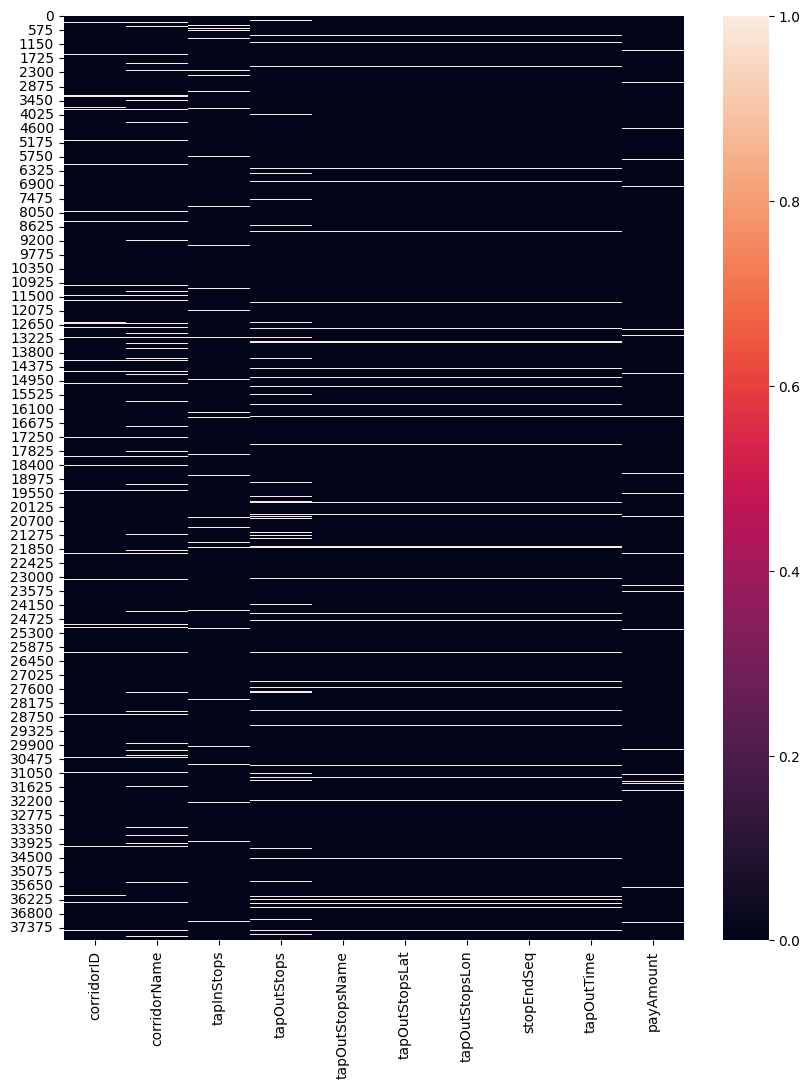

In [21]:
plt.figure(figsize=(10,12))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime', 'payAmount' ]].isna())

Dari output yang ada di atas di ketahui bahwa:
- Missing value yang terdapat dalam kolom `corridorName` dan `tapOutStops` lebih dari 5%
- Missing value yang terdapat dalam kolom `corridorID` dan juga `corridorName` memiliki keterkaitan yang dapat dilihat dari garisnya yang saling berhubungan
- Begitu juga dengan missing value yang terdapat dalam kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, stop`EndSeq dan `tapOutTime` memiliki beberapa garis yang berhubungan dan memiliki persentase yang sama yaitu 3,55%
- Sementara untuk kolom `payAmount` tidak memiliki keterkaitan atau hubungan dengan kolom manapun


Untuk mengakali missing value yang ada, dapat dilakukan 2 cara:
1. Menghapus baris yang memiliki missing value, namun cara ini tidak direkomendasikan karena total missing value yang lumayan banyak sehingga dapat mengganggu dalam analisis
2. Mengisi missing values, dikarenakan ada beberapa kolom missing values yang secara domain knowladge saling berhubungan, maka dapat mengisinya dengan cara menghubungkannya dengan kolom lain, namun jika masih ada beberapa baris yang `null` barulah akan dilakukan penghapusan

Di karenakan kolom transID yang hanya berisikan unique ID transaksi tidak diperlukan pada tahap analisis, maka akan dihapus

In [22]:
df.drop('transID', axis=1, inplace=True)

Lalu mengubah tipe data pada kolom `payCardID` yang sebelumnya bertipe `int64` menjadi `object`, dan juga mengubah `tapInTime` dan `tapOutTime` menjadi tipe `datetime` karena sebelumnya bertipe `object`

In [23]:
df['payCardID'] = df['payCardID'].astype(str)
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   payCardID         37900 non-null  object        
 1   payCardBank       37900 non-null  object        
 2   payCardName       37900 non-null  object        
 3   payCardSex        37900 non-null  object        
 4   payCardBirthDate  37900 non-null  int64         
 5   corridorID        36643 non-null  object        
 6   corridorName      35970 non-null  object        
 7   direction         37900 non-null  float64       
 8   tapInStops        36687 non-null  object        
 9   tapInStopsName    37900 non-null  object        
 10  tapInStopsLat     37900 non-null  float64       
 11  tapInStopsLon     37900 non-null  float64       
 12  stopStartSeq      37900 non-null  int64         
 13  tapInTime         37900 non-null  datetime64[ns]
 14  tapOutStops       3561

Dari analisis sebelumnya terkait dataset, diketahui bahwa corridorID dan juga corridorName saling berhubungan, maka akan kita isi berdasarkan hubungan tersebut.

In [24]:
df[['corridorID', 'corridorName']].isna().sum()


corridorID      1257
corridorName    1930
dtype: int64

Diketahui bahwa terdapat 1257 jumlah baris yang missing dalam kolom `corridorID` dan 1930 jumlah baris yang missing dalam kolom `corridorName`. Dengan melakukan teknik maping berdasarkan data yang saling berhubungan. Hal ini akan memungkinkan untuk saling mengisi kedua kolom yang missing, dikarenakan untuk `corridorName` pasti memiliki `corridorID` yang sama, begitu juga sebaliknya.

In [25]:
# 1. Buat mapping corridorName ke corridorID (dari data yang valid)
name_to_id_mapping = (
    df.dropna(subset=['corridorName', 'corridorID'])
      .drop_duplicates('corridorName')
      .set_index('corridorName')['corridorID']
)

# 2. Isi corridorID yang kosong berdasarkan corridorName
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(name_to_id_mapping))

# 3. (Opsional) Cek hasil
print("Sisa corridorID yang masih kosong:", df['corridorID'].isna().sum())


Sisa corridorID yang masih kosong: 1125


Dari kode diatas diketahui walaupun berhubungan, tapi jumlah baris yang hanya dapat di isi berjumlah 132 dari 1257 baris yang kosong. Hal ini terjadi karena ada beberapa baris di kolom `corridorName` yang masih kosong.

Mengisi missing value pada field `corridorID` berdasarkan `tapInStopsLat` dan `tapInStopLon`

Berdasarkan domain knowladge data yang ada dapat memberikan penjelasan terkait posisi geografis dari setiap lokasi koridor. Dan setiap koordinat adalah unique, sehingga satu `corridorID` hanya memiliki satu koordinat `tapInStopsLat` dan `tapInStopLon`.

In [26]:
# 1. Hitung lokasi unik
latlon_corridor_counts = df.groupby(['tapInStopsLat', 'tapInStopsLon'])['corridorID'].nunique()
unique_latlon = latlon_corridor_counts[latlon_corridor_counts == 1].index

# 2. Mapping lokasi unik ke corridorID
df_unique_latlon = df.set_index(['tapInStopsLat', 'tapInStopsLon']).loc[unique_latlon].reset_index()
df_unique_latlon = df_unique_latlon.dropna(subset=['corridorID'])
latlon_to_id = df_unique_latlon.drop_duplicates(subset=['tapInStopsLat', 'tapInStopsLon']) \
    .set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']

# 3. Isi corridorID yang kosong hanya untuk lokasi unik
def fill_corridor_id(row):
    if pd.isna(row['corridorID']):
        return latlon_to_id.get((row['tapInStopsLat'], row['tapInStopsLon']), np.nan)
    return row['corridorID']

df['corridorID'] = df.apply(fill_corridor_id, axis=1)

# 4. (Opsional) Cek hasil
print("Sisa corridorID yang masih kosong:", df['corridorID'].isna().sum())


Sisa corridorID yang masih kosong: 610


Setelah melakukan pengisian `corridorID` berdasarkan `tapInStopsLat` dan `tapInStopsLon` hanya menyisakan 610 `corridorID` yang masih `null`, ini dikarenakan ada beberapa lokasi yang memiliki lebih dari satu koridor.

In [27]:
# 1. Mapping corridorID → corridorName dari data valid
id_to_name_mapping = (
    df.dropna(subset=['corridorID', 'corridorName'])
      .drop_duplicates('corridorID')
      .set_index('corridorID')['corridorName']
)

# 2. Isi corridorName yang kosong berdasarkan corridorID
df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(id_to_name_mapping))

# 3. (Opsional) Cek hasil
print('Sisa corridorName yang masih kosong:', df['corridorName'].isna().sum())

Sisa corridorName yang masih kosong: 610


Dengan memanfaatkan `corridorID` yang sudah diisi sebelumnya, kita akan mengisi `corridorName` berdasarkan `corridorID`. Dengan hasil masih ada 610 baris `null` yang ada di `corridorName`, dikarenakan `corridorID` sendiri masih ada 610 yang `null`

In [28]:
df_none = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_none['% Total Missing Value'] = (df_none['Missing Value'] / len(df) * 100).round(3)
df_none

,column,Missing Value,% Total Missing Value
0,payCardID,0,0.000
1,payCardBank,0,0.000
2,payCardName,0,0.000
3,payCardSex,0,0.000
4,payCardBirthDate,0,0.000
5,corridorID,610,1.609
6,corridorName,610,1.609
7,direction,0,0.000
8,tapInStops,1213,3.201
9,tapInStopsName,0,0.000


Mengisi missing value pada field `tapInStops` dengan `tapInStopsName`

Masih dengan pendekatan yang sama dengan `corridorID` dan `corridorName`, dikarenakan `tapInStops` mewakili `tapInStopsName` maka dapat diisi menggunakannya

In [29]:
# 1. Mapping nama halte ke kode halte
name_to_code_mapping = (
    df.dropna(subset=['tapInStops', 'tapInStopsName'])
      .drop_duplicates('tapInStopsName')
      .set_index('tapInStopsName')['tapInStops']
)

# 2. Isi tapInStops yang kosong berdasarkan tapInStopsName
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(name_to_code_mapping))

# 3. (Opsional) Cek hasil
print('Sisa tapInStops yang masih kosong:', df['tapInStops'].isna().sum())


Sisa tapInStops yang masih kosong: 34


Sekarang sisa 34 baris yang kosong dari `tapInStops`, dan ini akan dihapus nantinya.

Mengisi missing value pada field `tapOutStops` dengan `tapOutStopsName`

sama dengan `tapInStops`, dikarenakan `tapOutStops` mewakili `tapOutStopsName` maka dapat diisi menggunakannya

In [30]:
# 1. Mapping tapOutStopsName → tapOutStops
tapout_name_to_code = (
    df.dropna(subset=['tapOutStops', 'tapOutStopsName'])
      .drop_duplicates('tapOutStopsName')
      .set_index('tapOutStopsName')['tapOutStops']
)

# 2. Isi tapOutStops yang kosong berdasarkan tapOutStopsName
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapout_name_to_code))

# 3. (Opsional) Cek hasil
print('Sisa tapOutStops yang masih kosong:', df['tapOutStops'].isna().sum())


Sisa tapOutStops yang masih kosong: 1363


Sekarang sisa 1363 baris yang kosong dari `tapOutStops`, dan ini akan dihapus nantinya.

In [31]:
df_none = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_none['% Total Missing Value'] = (df_none['Missing Value'] / len(df) * 100).round(3)
df_none

,column,Missing Value,% Total Missing Value
0,payCardID,0,0.000
1,payCardBank,0,0.000
2,payCardName,0,0.000
3,payCardSex,0,0.000
4,payCardBirthDate,0,0.000
5,corridorID,610,1.609
6,corridorName,610,1.609
7,direction,0,0.000
8,tapInStops,34,0.090
9,tapInStopsName,0,0.000


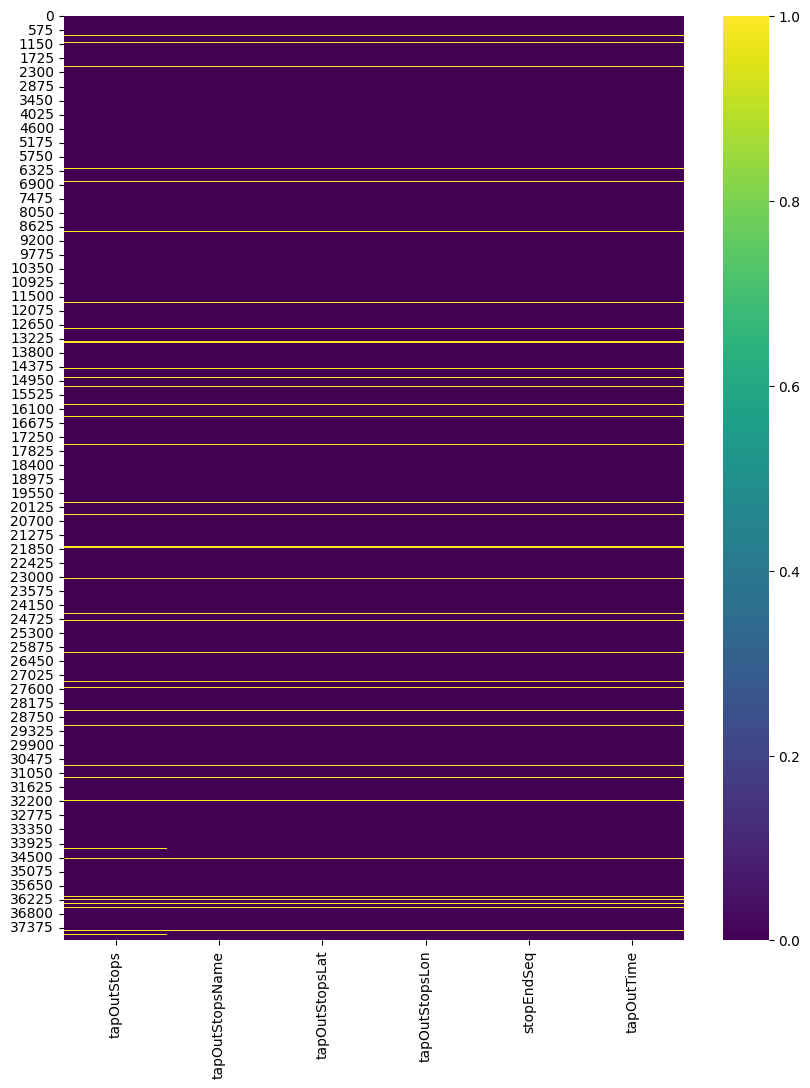

In [32]:
plt.figure(figsize=(10, 12))
sns.heatmap(df[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq','tapOutTime' ]].isnull(), cmap='viridis')
plt.show()

Berdasarkan Heatmap diatas dapat disimpulkan bahwa:
- Sebaran missing values yang ada selain di `tapOutStops` saling berhubungan
- Penghapusan data menjadi solusi untuk melakukan analisis lebih lanjut

Handlng Missing value pada kolom `payAmount`

Untuk mengisi kolom `payAmount` yang null, akan dilakukan secara manual dikarenakan ini adalah kolom total pembayaran transjakarta, yang dimana harga yang berlaku flatt atau sama untuk semuanya. Dimana untuk Jaklingko Rp.0, TransJakarta Rp.3500, dan RoyalTrans diharga Rp.20.000. Tapi sebelum mengisi kolom, kita lihat terlebih dahulu berdasarkan corridorID mana saja yang kosong pada kolom `payAmount`

In [33]:
missing_payamount = df[df['payAmount'].isna()]
count_missing_per_corridor = missing_payamount['corridorID'].value_counts()
print(count_missing_per_corridor)

corridorID
M7B        311
JAK.48A    249
M1H        171
JAK.48B    162
3H          91
Name: count, dtype: int64


In [34]:
df.loc[df['corridorID'] == 'JAK.48A', 'payAmount'] = 0
df.loc[df['corridorID'] == 'JAK.48B', 'payAmount'] = 0
df.loc[df['corridorID'] == 'M7B', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'M1H', 'payAmount'] = 3500
df.loc[df['corridorID'] == '3H', 'payAmount'] = 3500

Berdasarkan domain knowledge, diketahui nilai payAmount untuk masing-masing koridor ID yang kosong, sebagai berikut:

- corridorID M7B berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/rute) merupakan Layanan Non BRT dengan tarif Rp. 3500
- corridorID 3H berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/rute) merupakan Layanan BRT dengan tarif Rp. 3500
- corridorID JAK.48A & JAK.48B berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/rute) dan laman kompas serta detik.com termasuk kategori Mikrotrans (Jaklingko) dengan tarif Rp. 0

In [35]:
df_none = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_none['% Total Missing Value'] = (df_none['Missing Value'] / len(df) * 100).round(3)
df_none

,column,Missing Value,% Total Missing Value
0,payCardID,0,0.000
1,payCardBank,0,0.000
2,payCardName,0,0.000
3,payCardSex,0,0.000
4,payCardBirthDate,0,0.000
5,corridorID,610,1.609
6,corridorName,610,1.609
7,direction,0,0.000
8,tapInStops,34,0.090
9,tapInStopsName,0,0.000


Setelah dilakukan handling terhadap missing value berdasarkan domain knowladge, masih tetap ada beberapa baris di payAmount yang masih kosong. Selanjutnya akan dilakukan penghapusan atau drop baris yang masih memiliki sisa missing value yang ada di `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, `payAmount`.

In [36]:
df_drop = ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']
df.dropna(subset= df_drop, inplace= True)

In [37]:
df.isna().sum()


payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [38]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(35920, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,payCardID,object,0,1976,"[4868902332492297, 4384653483539395]"
1,payCardBank,object,0,6,"[online, dki]"
2,payCardName,object,0,1969,"[Hj. Nilam Pratiwi, S.E., Shania Kusumo]"
3,payCardSex,object,0,2,"[M, F]"
4,payCardBirthDate,int64,0,66,"[1962, 1955]"
5,corridorID,object,0,221,"[9E, JAK.28]"
6,corridorName,object,0,216,"[Tanjung Priok - Tanah Merdeka, Stasiun Tebet - Karet via Patra Kuningan]"
7,direction,float64,0,2,"[0.0, 1.0]"
8,tapInStops,object,0,2492,"[B03551P, B05264P]"
9,tapInStopsName,object,0,2491,"[Flyover Kampung Melayu, Rest Area TMII]"


Setelah dilakukan penghapusan missing value pada setiap kolom, diperoleh bahwa jumlah yang dihapus adalah 1980 dari 37900 total baris yang ada, atau sekitar 5,23%.

Export dataset yang sudah dicleaning kedalam Excel

In [39]:
df.to_excel('Transjakarta_clean.xlsx', index= False)


## Data Analysis

### 1. Distribusi Penumpang

#### Jumlah Penumpang per Koridor

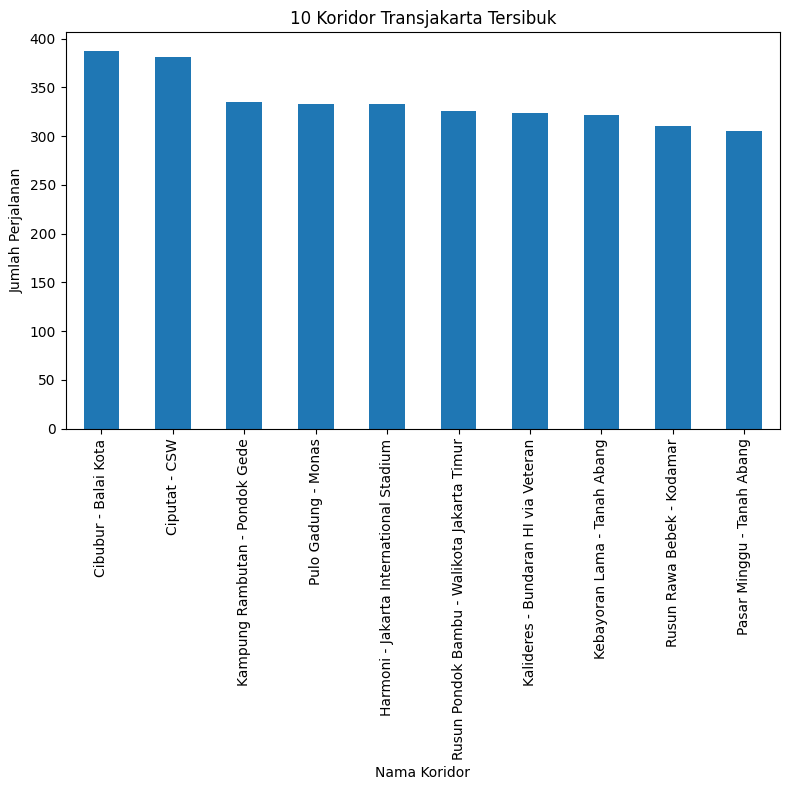

10 Koridor Transjakarta Tersibuk (berdasarkan jumlah perjalanan):
corridorName
Cibubur - Balai Kota                           387
Ciputat - CSW                                  381
Kampung Rambutan - Pondok Gede                 335
Pulo Gadung - Monas                            333
Harmoni - Jakarta International Stadium        333
Rusun Pondok Bambu - Walikota Jakarta Timur    326
Kalideres - Bundaran HI via Veteran            324
Kebayoran Lama - Tanah Abang                   322
Rusun Rawa Bebek - Kodamar                     310
Pasar Minggu - Tanah Abang                     305
Name: count, dtype: int64


In [40]:
# Hitung jumlah perjalanan per koridor
koridor_counts = df['corridorName'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
koridor_counts.plot(kind='bar')
plt.title('10 Koridor Transjakarta Tersibuk')
plt.xlabel('Nama Koridor')
plt.ylabel('Jumlah Perjalanan')
plt.tight_layout()
plt.show()

print("10 Koridor Transjakarta Tersibuk (berdasarkan jumlah perjalanan):")
print(koridor_counts)

1. Dominasi Koridor Cibubur - Balai Kota & Ciputat - CSW
- Dua koridor ini memiliki jumlah perjalanan tertinggi, mendekati angka 400 perjalanan selama periode pengamatan. Ini menandakan kedua rute tersebut adalah jalur vital dan menjadi tumpuan utama mobilitas warga, terutama dari kawasan penyangga menuju pusat kota atau transit utama.

2. Polanya Linear, Tidak Ada Gap Ekstrem
- Selisih antar posisi tidak terlalu ekstrem, hanya selisih puluhan perjalanan antar koridor di posisi 3–10. Hal ini mengindikasikan bahwa tingkat kepadatan di berbagai koridor utama Transjakarta relatif merata, tanpa satu koridor pun yang mendominasi secara signifikan setelah dua teratas.

3. Kawasan Transit & Penghubung Antarkota
- Hampir semua koridor tersibuk menghubungkan kawasan hunian padat di pinggiran (Cibubur, Ciputat, Kampung Rambutan, Pondok Gede, Rawabebek) dengan pusat ekonomi atau transit utama di kota (Balai Kota, CWS, Monas, Tanah Abang).
- Ini menegaskan peran Transjakarta sebagai backbone penghubung mobilitas antar wilayah satelit dengan pusat kota Jakarta.

4. Rute Menuju Pusat Aktivitas & Perkantoran
- Koridor seperti Pulogadung–Monas, Harmoni–Jakarta International Stadium, Kalideres–Bundaran HI via Veteran, dan Kebayoran Lama–Tanah Abang semuanya mengarah ke pusat aktivitas bisnis dan perkantoran. Rute-rute ini sangat strategis terutama pada jam kerja dan menjadi prioritas dalam manajemen armada dan jadwal operasional.

5. Implikasi untuk Manajemen Armada
- Dengan kepadatan merata di top 10, strategi distribusi armada harus tetap mempertahankan suplai bus yang seimbang di rute-rute ini.
- Namun, dua koridor teratas dapat dipertimbangkan untuk mendapatkan prioritas penambahan armada atau penggunaan bus berkapasitas lebih besar, serta penerapan sistem antrean dinamis di halte tertentu.

6. Potensi untuk Elektrifikasi Bus
- Koridor-koridor ini bisa menjadi kandidat prioritas untuk pengadaan bus listrik karena volume penumpang tinggi akan mempercepat break even investasi dan mendukung branding “green mobility” Transjakarta.



#### Pola Jam Sibuk (Rush Hour) Harian

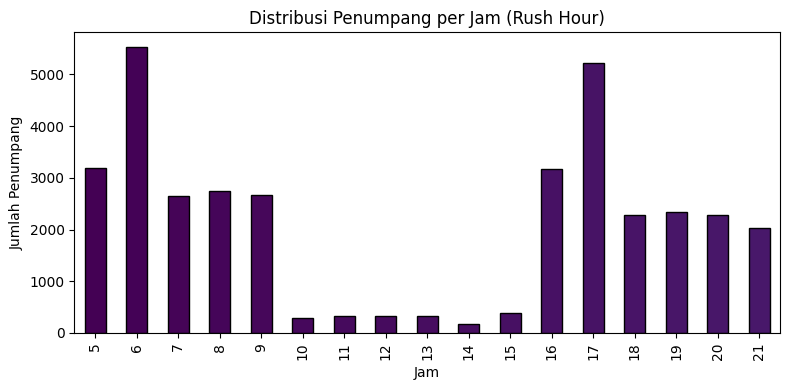

In [41]:
df['jam'] = df['tapInTime'].dt.hour
jam_counts = df['jam'].value_counts().sort_index()

plt.figure(figsize=(8,4))
jam_counts.plot(kind='bar', color=plt.cm.viridis.colors, edgecolor='black')
plt.title('Distribusi Penumpang per Jam (Rush Hour)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.tight_layout()
plt.show()

1. Rush Hour Sangat Jelas:
- Puncak pagi: Lonjakan penumpang tertinggi terjadi pukul 06.00 dengan lebih dari 5.000 penumpang. Pukul 05.00 dan 07.00–09.00 juga masih tinggi, menunjukkan orang mulai berangkat lebih pagi, kemungkinan untuk menghindari kemacetan atau sistem kerja shift.
- Puncak sore/malam: Puncak kedua terjadi pukul 17.00 (sekitar 5.200 penumpang) dan tinggi di pukul 16.00, menandakan jam pulang kerja. Pukul 18.00–21.00 juga masih cukup tinggi meskipun mulai menurun.

2. Jam Sepi Sangat Jelas (Off-Peak):
- Periode antara 10.00–15.00 sangat sepi, penumpang sangat minim. Ini waktu di mana bus cenderung “kosong” atau hanya digunakan oleh pekerja shift, pelajar, atau segmen non-kantoran.

3. Implikasi Operasional:
- Optimasi Armada: Jumlah armada harus sangat diperbanyak pada jam-jam puncak (05.00–09.00 dan 16.00–18.00), sedangkan pada jam-jam off-peak armada bisa dikurangi untuk efisiensi biaya.

4. Perilaku Penumpang:
- Pola klasik urban: Sebagian besar penumpang adalah pekerja/mahasiswa yang melakukan perjalanan rutin pagi-sore. Sangat sedikit pengguna yang naik di luar jam tersebut.
- Antisipasi Lonjakan: Hari-hari tertentu (misal: Senin atau hari libur nasional) bisa mengalami lonjakan lebih tinggi pada jam-jam ini.

#### Persebaran penumpang per jam dan hari

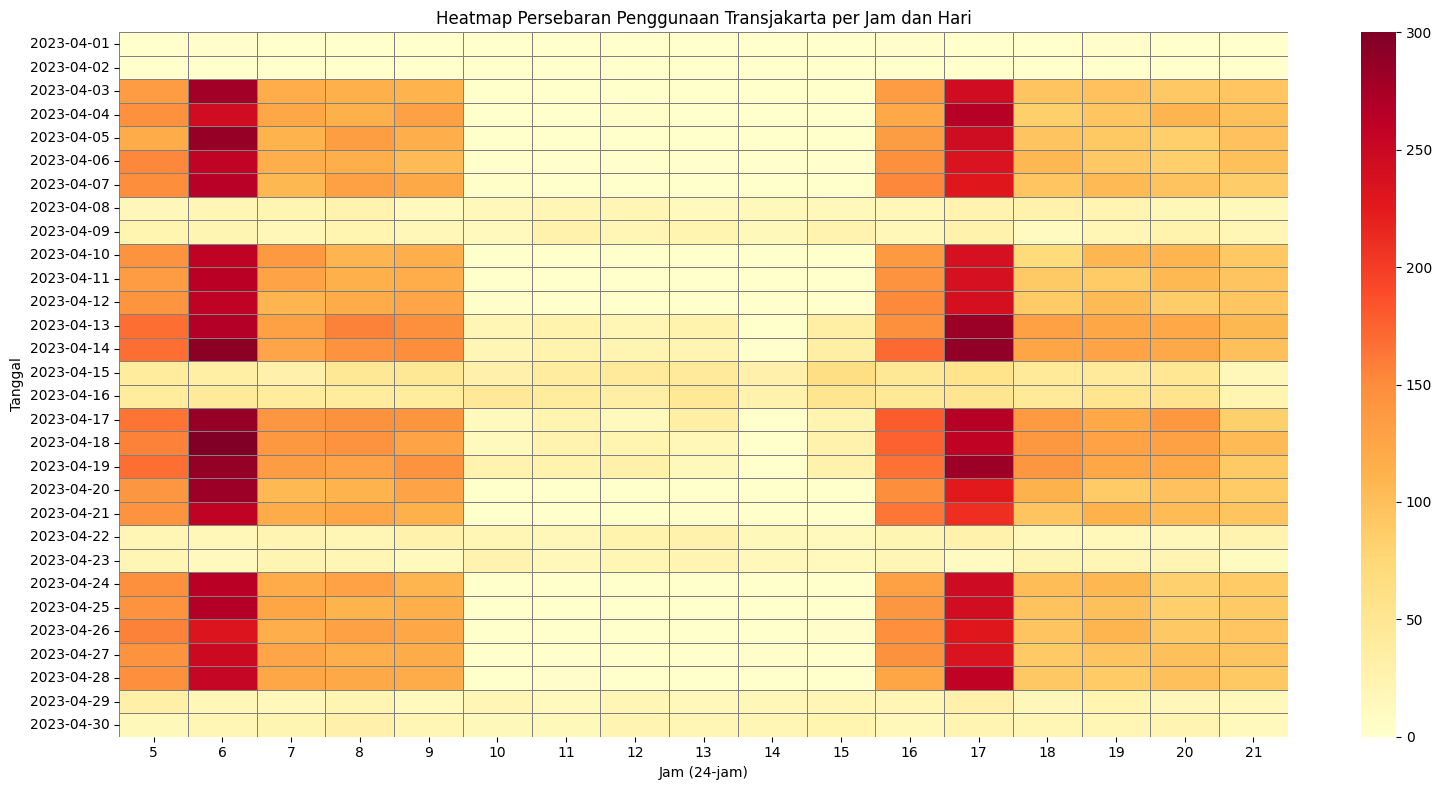

In [42]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tanggal'] = df['tapInTime'].dt.date
df['jam'] = df['tapInTime'].dt.hour

# 3. Buat pivot table: baris=tanggal, kolom=jam, isi=jumlah penumpang
pivot = df.pivot_table(index='tanggal', columns='jam', values='payCardID', aggfunc='count', fill_value=0)

# 4. Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=.5, linecolor='grey')
plt.title('Heatmap Persebaran Penggunaan Transjakarta per Jam dan Hari')
plt.xlabel('Jam (24-jam)')
plt.ylabel('Tanggal')
plt.tight_layout()
plt.show()

Polanya Konsisten Setiap Hari Kerja (Weekday):
- Terlihat jelas pola warna merah pekat di pukul 06.00 dan 17.00 hampir di semua hari kerja (Senin–Jumat).
- Ini menandakan bahwa lonjakan penumpang terjadi secara rutin setiap pagi dan sore, bertepatan dengan jam berangkat dan pulang kerja/sekolah.

#### Penumpang berdasarkan jenis kelamin

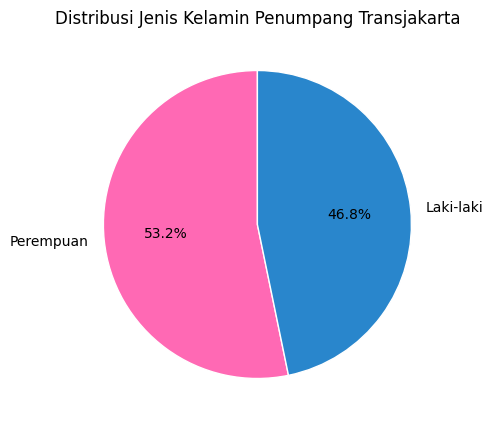

In [43]:
sex_counts = df['payCardSex'].value_counts()

# Mapping warna (asumsi F = Female, M = Male, urut dari sex_counts)
warna = []
for gender in sex_counts.index:
    if gender.upper() == 'F':
        warna.append('#FF69B4')  # Hot Pink
    else:
        warna.append('#2986cc')  # Biru

plt.figure(figsize=(5,5))
plt.pie(
    sex_counts,
    labels=sex_counts.index.map({'F': 'Perempuan', 'M': 'Laki-laki'}),  # Bisa disesuaikan label
    autopct='%1.1f%%',
    startangle=90,
    colors=warna,
    wedgeprops={'edgecolor':'white'}
)
plt.title('Distribusi Jenis Kelamin Penumpang Transjakarta')
plt.show()

Mayoritas penumpang Transjakarta adalah perempuan (53,2%) sedangkan laki - laki (46,8%), meskipun selisihnya tidak terlalu besar. Fakta ini menjadi keunggulan sekaligus tantangan untuk terus meningkatkan keamanan dan kenyamanan bagi seluruh pengguna, khususnya perempuan sebagai mayoritas.

#### Penumpang berdasarkan kategori umur

C:\Users\denni\AppData\Local\Temp\ipykernel_21888\326733958.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(distribusi.index, rotation=15)


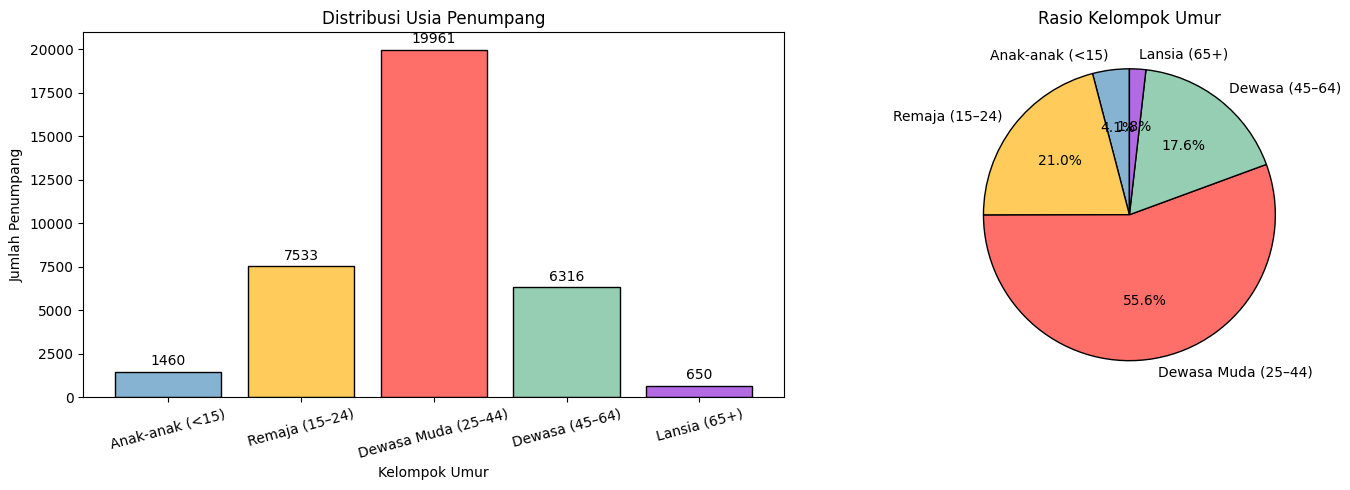

                     Jumlah Penumpang  Rasio (%)
kelompok_umur                                   
Anak-anak (<15)                  1460       4.06
Remaja (15–24)                   7533      20.97
Dewasa Muda (25–44)             19961      55.57
Dewasa (45–64)                   6316      17.58
Lansia (65+)                      650       1.81


In [44]:
import datetime
# 2. Hitung umur penumpang
df['payCardBirthDate'] = pd.to_numeric(df['payCardBirthDate'], errors='coerce')
current_year = datetime.datetime.now().year
df['usia'] = current_year - df['payCardBirthDate']

# 3. Buat kategori kelompok umur
def kategori_umur(usia):
    if usia < 15:
        return 'Anak-anak (<15)'
    elif usia < 25:
        return 'Remaja (15–24)'
    elif usia < 45:
        return 'Dewasa Muda (25–44)'
    elif usia < 65:
        return 'Dewasa (45–64)'
    else:
        return 'Lansia (65+)'

df['kelompok_umur'] = df['usia'].apply(kategori_umur)

# 4. Hitung distribusi & rasio per kelompok umur
kategori_order = [
    'Anak-anak (<15)',
    'Remaja (15–24)',
    'Dewasa Muda (25–44)',
    'Dewasa (45–64)',
    'Lansia (65+)',
]
distribusi = df['kelompok_umur'].value_counts().reindex(kategori_order, fill_value=0)
rasio = distribusi / distribusi.sum() * 100
warna = ['#86b3d1', '#ffcc5c', '#ff6f69', '#96ceb4', '#b36ae2']

# 5. Visualisasi bar chart & pie chart berdampingan
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart (jumlah penumpang)
bars = axes[0].bar(distribusi.index, distribusi.values, color=warna, edgecolor='black')
axes[0].set_xlabel('Kelompok Umur')
axes[0].set_ylabel('Jumlah Penumpang')
axes[0].set_title('Distribusi Usia Penumpang')
axes[0].set_xticklabels(distribusi.index, rotation=15)

# Tambahkan label angka di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + distribusi.max()*0.01, 
                 f"{int(yval)}",
                 ha='center', va='bottom', fontsize=10)

# Pie chart (rasio)
axes[1].pie(
    distribusi, 
    labels=distribusi.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=warna, 
    wedgeprops={'edgecolor':'black'}
)
axes[1].set_title('Rasio Kelompok Umur')

plt.tight_layout()
plt.show()

# (Opsional) Tampilkan tabel distribusi & rasio
tabel = pd.DataFrame({'Jumlah Penumpang': distribusi, 'Rasio (%)': rasio.round(2)})
print(tabel)

Transjakarta adalah tulang punggung mobilitas masyarakat usia produktif di Jakarta. Kelompok usia 25–44 tahun mendominasi, sementara remaja dan dewasa senior juga signifikan. Penetrasi ke anak-anak dan lansia masih sangat rendah—peluang inovasi layanan untuk inklusi lebih luas.

#### Distribusi Metode Pembayaran

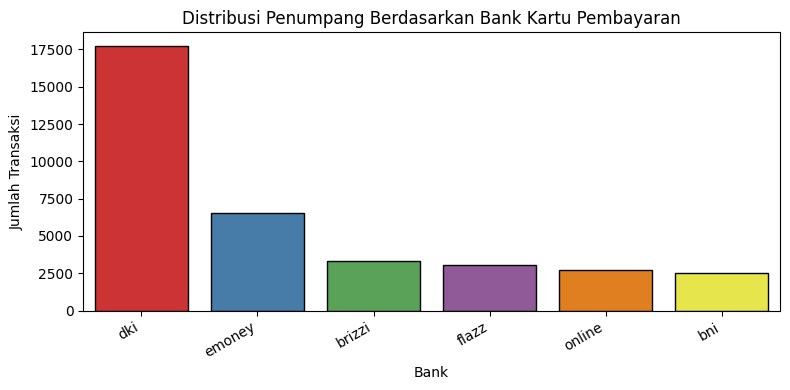

In [45]:
if 'payCardBank' in df.columns:
    bank_counts = df['payCardBank'].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=bank_counts.index, y=bank_counts.values, hue=bank_counts.index, palette='Set1', edgecolor='black')
    plt.title('Distribusi Penumpang Berdasarkan Bank Kartu Pembayaran')
    plt.xlabel('Bank')
    plt.ylabel('Jumlah Transaksi')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

1. Dominasi Kartu DKI
- Kartu DKI (JakCard dari Bank DKI) sangat mendominasi transaksi pembayaran tiket, dengan jumlah transaksi jauh di atas kartu lain (sekitar 18.000+ transaksi).
- Hal ini menunjukkan penetrasi dan kepercayaan masyarakat Jakarta pada produk lokal Bank DKI sangat tinggi, sekaligus keberhasilan integrasi JakCard di ekosistem transportasi publik Jakarta.

2. eMoney (Mandiri) Sebagai Alternatif Utama
- eMoney dari Bank Mandiri menempati posisi kedua dengan jumlah transaksi yang cukup besar (sekitar 6.500), menjadi pilihan utama setelah JakCard.
- Artinya, segmentasi pengguna juga berasal dari komunitas perbankan besar nasional, terutama pengguna regular bank swasta/BUMN.

3. Brizzi, Flazz, Online, dan BNI Jauh di Bawah
- Penggunaan Brizzi (BRI), Flazz (BCA), kartu online, dan BNI relatif jauh lebih kecil. Penyebabnya bisa berupa keterbatasan integrasi, promosi, atau kebiasaan pengguna di Jakarta yang sudah terbiasa dengan JakCard/eMoney.
- “Online” kemungkinan merujuk pada metode pembayaran digital lain (misal: QRIS, e-wallet, dsb) yang masih belum dominan di ekosistem Transjakarta.

4. Peluang Kolaborasi & Inovasi Pembayaran
- Data ini membuka peluang kerjasama dan promosi lebih intensif antara Transjakarta dan bank-bank lain agar pengguna semakin punya banyak opsi pembayaran.
- Inovasi dengan integrasi QRIS, e-wallet, atau pembayaran berbasis aplikasi bisa menjadi strategi memperluas basis pelanggan.

### 2. Analisis Koridor dan Rute

#### Sebaran Penumpang per Koridor (Bar Chart/Heatmap Sederhana)

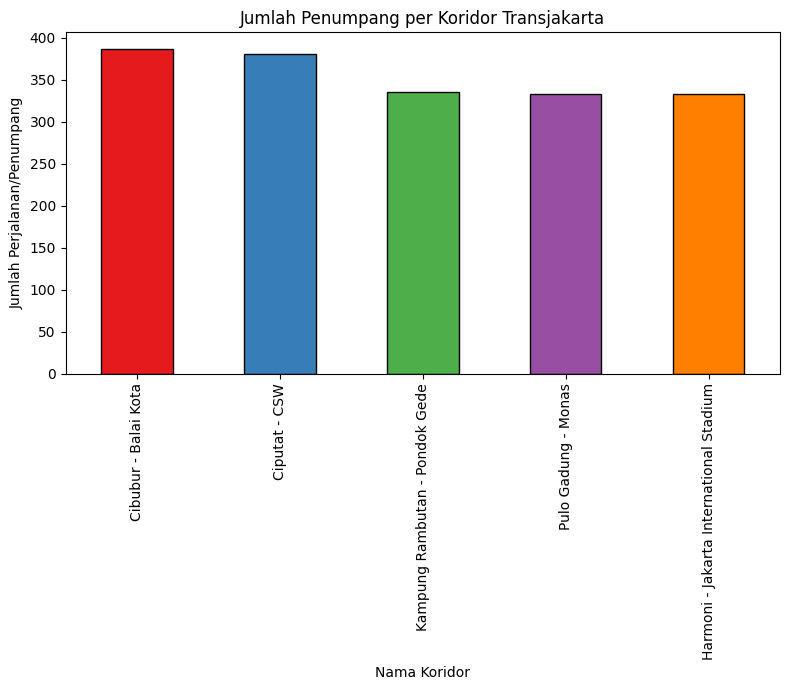

Top 5 Koridor dengan Penumpang Terbanyak:
corridorName
Cibubur - Balai Kota                       387
Ciputat - CSW                              381
Kampung Rambutan - Pondok Gede             335
Pulo Gadung - Monas                        333
Harmoni - Jakarta International Stadium    333
Name: count, dtype: int64


In [46]:
# Hitung jumlah perjalanan/penumpang per koridor
koridor_counts = df['corridorName'].value_counts().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,7))
koridor_counts.plot(kind='bar', color=plt.cm.Set1.colors, edgecolor='black')
plt.title('Jumlah Penumpang per Koridor Transjakarta')
plt.xlabel('Nama Koridor')
plt.ylabel('Jumlah Perjalanan/Penumpang')
plt.tight_layout()
plt.show()

print('Top 5 Koridor dengan Penumpang Terbanyak:')
print(koridor_counts.head(5))

1. Koridor Cibubur – Balai Kota & Ciputat – CSW Paling Ramai
- Kedua koridor ini berada di urutan teratas dengan jumlah perjalanan/penumpang sekitar 380–390. Ini menegaskan posisi mereka sebagai jalur utama yang menghubungkan area hunian padat di pinggiran (Cibubur, Ciputat) dengan pusat kota atau transit utama.
- Menjadi indikasi kuat bahwa koridor ini adalah tulang punggung mobilitas harian bagi komuter di wilayah timur dan selatan Jakarta.

2. Tiga Koridor Lain Juga Penting tapi Tidak Setinggi Dua Teratas
- Kampung Rambutan – Pondok Gede, Pulogadung – Monas, dan Harmoni – JIS masing-masing mencatat angka sekitar 330 perjalanan/penumpang, sedikit di bawah dua teratas.
- Seluruhnya menghubungkan kawasan hunian padat atau terminal utama dengan pusat aktivitas kota (Monas, Harmoni, JIS).

#### Analisis Rute: Sebaran Penumpang per Rute (Asal–Tujuan Halte)

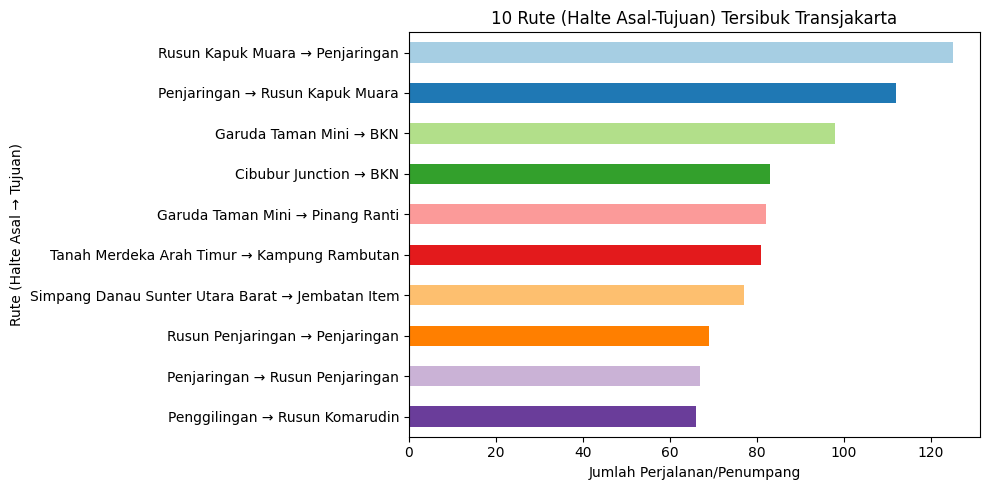


10 Rute Tersibuk (Asal → Tujuan):
rute
Rusun Kapuk Muara → Penjaringan                     125
Penjaringan → Rusun Kapuk Muara                     112
Garuda Taman Mini → BKN                              98
Cibubur Junction → BKN                               83
Garuda Taman Mini → Pinang Ranti                     82
Tanah Merdeka Arah Timur → Kampung Rambutan          81
Simpang Danau Sunter Utara Barat → Jembatan Item     77
Rusun Penjaringan → Penjaringan                      69
Penjaringan → Rusun Penjaringan                      67
Penggilingan → Rusun Komarudin                       66
Name: count, dtype: int64


In [47]:
# Buat kolom rute (asal-tujuan)
df['rute'] = df['tapInStopsName'].astype(str) + ' → ' + df['tapOutStopsName'].astype(str)

# Hitung jumlah penumpang per rute
rute_counts = df['rute'].value_counts().head(10)

plt.figure(figsize=(10,5))
rute_counts.plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('10 Rute (Halte Asal-Tujuan) Tersibuk Transjakarta')
plt.xlabel('Jumlah Perjalanan/Penumpang')
plt.ylabel('Rute (Halte Asal → Tujuan)')
plt.gca().invert_yaxis()  # Supaya ranking 1 di atas
plt.tight_layout()
plt.show()

print('\n10 Rute Tersibuk (Asal → Tujuan):')
print(rute_counts)


Rute tersibuk Transjakarta didominasi oleh perjalanan antar rusun dan pusat aktivitas lokal (Penjaringan, BKN, dsb). Pola ini memperlihatkan pentingnya peran Transjakarta sebagai transportasi utama untuk kebutuhan komunitas urban dan mobilitas harian, bukan hanya komuter antarkota.

#### Heatmap Koridor

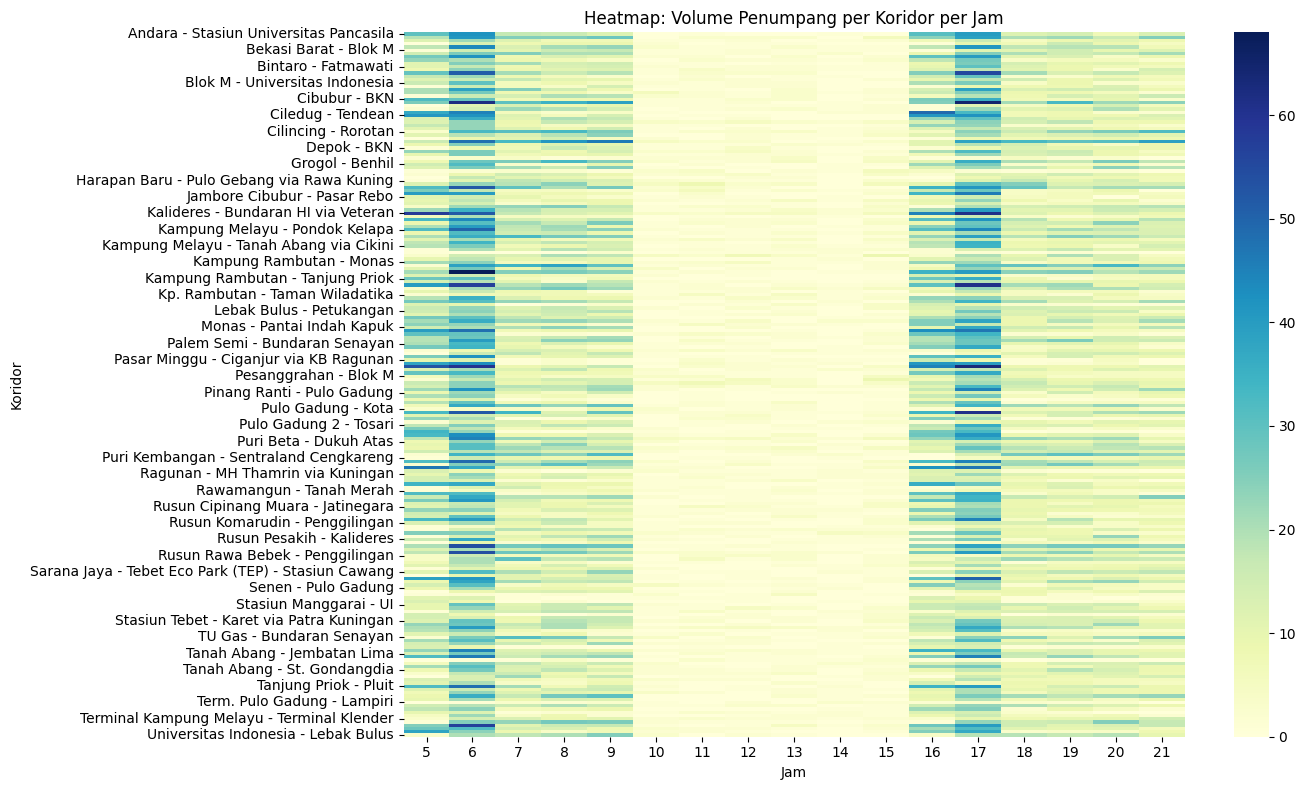

In [51]:
df['hour'] = pd.to_datetime(df['tapInTime']).dt.hour
pivot = pd.pivot_table(df, values='rute', index='corridorName', columns='hour', aggfunc='count', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Heatmap: Volume Penumpang per Koridor per Jam')
plt.xlabel('Jam')
plt.ylabel('Koridor')
plt.tight_layout()
plt.show()

Heatmap ini mempertegas peran Transjakarta sebagai moda utama di jam sibuk, khususnya pada rute penghubung hunian padat dan pusat aktivitas kota. Perencanaan berbasis data seperti ini adalah kunci untuk peningkatan layanan, efisiensi biaya, dan pengembangan masa depan (termasuk elektrifikasi armada).

1. Pola Rush Hour Konsisten di Semua Koridor
- Warna biru tua (volume tinggi) sangat dominan pada pukul 06.00–08.00 dan 16.00–18.00 di hampir semua koridor.
- Ini menandakan puncak perjalanan (rush hour) terjadi serentak di seluruh jaringan Transjakarta, baik pagi maupun sore, didorong oleh aktivitas kerja, sekolah, dan mobilitas rutin warga kota.

2.Sebaran Volume Tinggi pada Koridor Tertentu
- Beberapa koridor seperti Cibubur–BKN, Kampung Rambutan–Monas, Kalideres–Bundaran HI via Veteran, dan koridor dari/ke rusun tampak lebih gelap pada jam sibuk, artinya volume penumpangnya lebih tinggi dibanding rata-rata koridor lain.


### 3. Analisis Halte

#### Halte dengan Penumpang Masuk (Boarding/Tap-In) Terbanyak

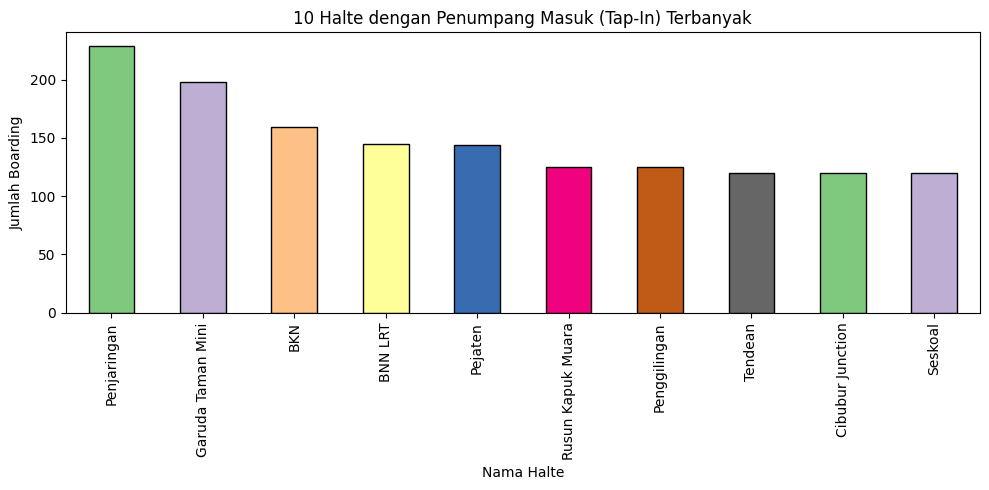

Top 10 Halte Boarding (Tap-In):
tapInStopsName
Penjaringan          229
Garuda Taman Mini    198
BKN                  159
BNN LRT              145
Pejaten              144
Rusun Kapuk Muara    125
Penggilingan         125
Tendean              120
Cibubur Junction     120
Seskoal              120
Name: count, dtype: int64


In [52]:
# Hitung jumlah boarding per halte
tapin_counts = df['tapInStopsName'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,5))
tapin_counts.head(10).plot(kind='bar', color=plt.cm.Accent.colors, edgecolor='black')
plt.title('10 Halte dengan Penumpang Masuk (Tap-In) Terbanyak')
plt.xlabel('Nama Halte')
plt.ylabel('Jumlah Boarding')
plt.tight_layout()
plt.show()

print("Top 10 Halte Boarding (Tap-In):")
print(tapin_counts.head(10))

####  Halte dengan Penumpang Keluar (Alighting/Tap-Out) Terbanyak

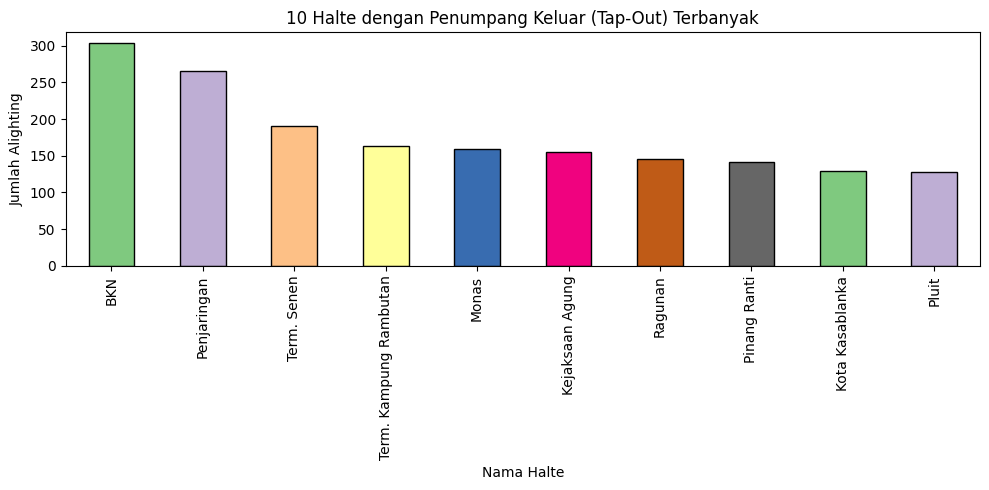

Top 10 Halte Alighting (Tap-Out):
tapOutStopsName
BKN                       303
Penjaringan               265
Term. Senen               190
Term. Kampung Rambutan    163
Monas                     159
Kejaksaan Agung           155
Ragunan                   145
Pinang Ranti              142
Kota Kasablanka           129
Pluit                     128
Name: count, dtype: int64


In [53]:
tapout_counts = df['tapOutStopsName'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,5))
tapout_counts.head(10).plot(kind='bar', color=plt.cm.Accent.colors, edgecolor='black')
plt.title('10 Halte dengan Penumpang Keluar (Tap-Out) Terbanyak')
plt.xlabel('Nama Halte')
plt.ylabel('Jumlah Alighting')
plt.tight_layout()
plt.show()

print("Top 10 Halte Alighting (Tap-Out):")
print(tapout_counts.head(10))


#### Halte Transit Paling Sibuk (Boarding & Alighting Tinggi)

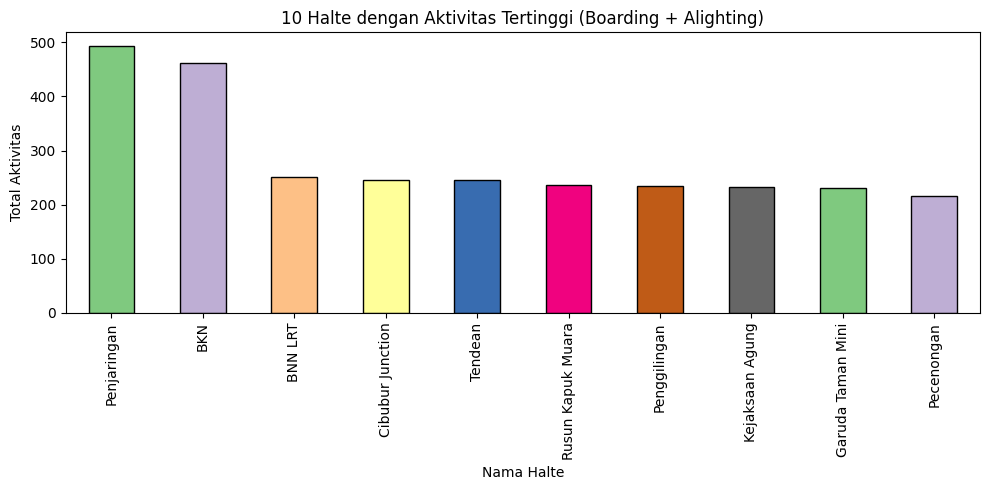

Top 10 Halte Aktivitas Boarding + Alighting:
Penjaringan          494.0
BKN                  462.0
BNN LRT              251.0
Cibubur Junction     246.0
Tendean              246.0
Rusun Kapuk Muara    237.0
Penggilingan         235.0
Kejaksaan Agung      233.0
Garuda Taman Mini    230.0
Pecenongan           216.0
Name: count, dtype: float64


In [54]:
# Gabungkan boarding dan alighting
total_counts = tapin_counts.add(tapout_counts, fill_value=0).sort_values(ascending=False)

plt.figure(figsize=(10,5))
total_counts.head(10).plot(kind='bar', color=plt.cm.Accent.colors, edgecolor='black')
plt.title('10 Halte dengan Aktivitas Tertinggi (Boarding + Alighting)')
plt.xlabel('Nama Halte')
plt.ylabel('Total Aktivitas')
plt.tight_layout()
plt.show()

print("Top 10 Halte Aktivitas Boarding + Alighting:")
print(total_counts.head(10))


Pola penumpang masuk dan keluar Transjakarta memperlihatkan fungsi utama jaringan ini sebagai penghubung kawasan hunian padat dan rusun ke pusat-pusat aktivitas, perkantoran, serta hub transportasi utama di Jakarta.
Penjaringan dan BKN adalah titik kunci, baik sebagai titik awal maupun tujuan akhir perjalanan harian.

#### Koridor dan halte mana saja yang mengalami kepadatan penumpang tertinggi pada jam-jam tertentu?

In [55]:
df['jam'] = pd.to_datetime(df['tapInTime']).dt.hour

grouped = (
    df.groupby(['corridorName', 'tapInStopsName', 'jam'])
    .size()
    .reset_index(name='total_penumpang')
)

grouped = grouped.sort_values('total_penumpang', ascending=False)
top10 = grouped.head(10)
print(top10)

                             corridorName          tapInStopsName  jam  \
5280               Pinang Ranti - Pramuka       Garuda Taman Mini    6   
6962      Rusun Kapuk Muara - Penjaringan             Penjaringan   17   
6968      Rusun Kapuk Muara - Penjaringan       Rusun Kapuk Muara    6   
2674  Kalideres - Bundaran HI via Veteran               Sumur Bor    5   
5274               Pinang Ranti - Pramuka                     BKN   17   
915                         Cibubur - BKN        Cibubur Junction   17   
458                   Bintaro - Fatmawati         Bintaro Xchange   17   
3739         Kebayoran Lama - Tanah Abang  Jak Lingko Tanah Abang    5   
6967      Rusun Kapuk Muara - Penjaringan       Rusun Kapuk Muara    5   
5715               Pulo Gadung 2 - Tosari            Pramuka BPKP   17   

      total_penumpang  
5280               42  
6962               32  
6968               31  
2674               26  
5274               24  
915                24  
458              

In [56]:
df['jam'] = pd.to_datetime(df['tapInTime']).dt.hour

pagi = df[df['jam'].between(6, 9)]

top_halte_pagi = (
    pagi.groupby(['corridorName', 'tapInStopsName'])
    .size()
    .reset_index(name='total_penumpang')
    .sort_values('total_penumpang', ascending=False)
    .head(10)
)

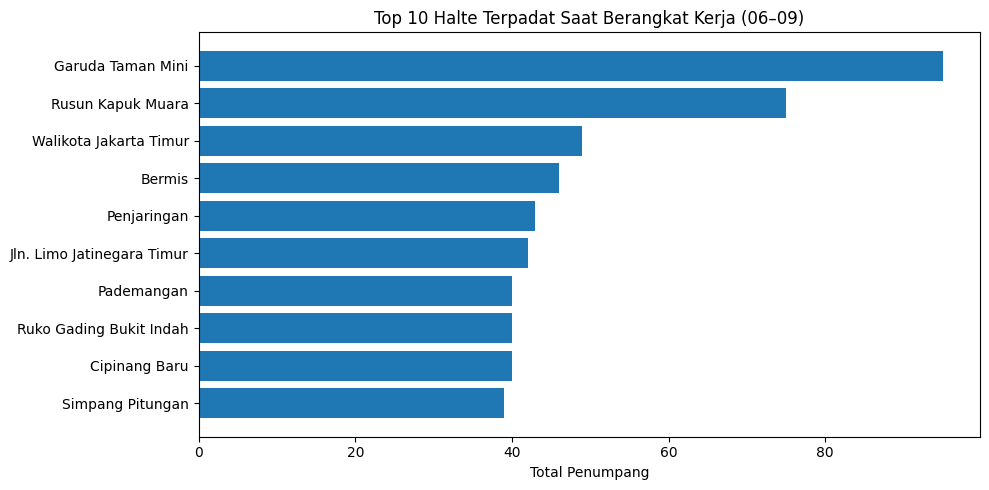

In [57]:
plt.figure(figsize=(10,5))
plt.barh(top_halte_pagi['tapInStopsName'][::-1], top_halte_pagi['total_penumpang'][::-1])
plt.xlabel('Total Penumpang')
plt.title('Top 10 Halte Terpadat Saat Berangkat Kerja (06–09)')
plt.tight_layout()
plt.show()

In [58]:
print('Top 10 Halte Terpadat Pagi:', top_halte_pagi)

Top 10 Halte Terpadat Pagi:                                        corridorName  \
791                          Pinang Ranti - Pramuka   
1040                Rusun Kapuk Muara - Penjaringan   
1042                 Rusun Komarudin - Penggilingan   
831                             Pulo Gadung - Monas   
1061                Rusun Penjaringan - Penjaringan   
1209                 Stasiun Tebet - Kampung Melayu   
631                           Matraman Baru - Ancol   
128   Cempaka Putih - Pulo Gadung via Kelapa Gading   
1422           Terminal Rawamangun - Cipinang Muara   
1050                  Rusun Marunda - Tanjung Priok   

                  tapInStopsName  total_penumpang  
791            Garuda Taman Mini               95  
1040           Rusun Kapuk Muara               75  
1042      Walikota Jakarta Timur               49  
831                       Bermis               46  
1061                 Penjaringan               43  
1209  Jln. Limo Jatinegara Timur               42  
63

In [59]:
df['jam'] = pd.to_datetime(df['tapInTime']).dt.hour


sore = df[df['jam'].between(16, 21)]

top_halte_sore = (
    sore.groupby(['corridorName', 'tapInStopsName'])
    .size()
    .reset_index(name='total_penumpang')
    .sort_values('total_penumpang', ascending=False)
    .head(10)
)

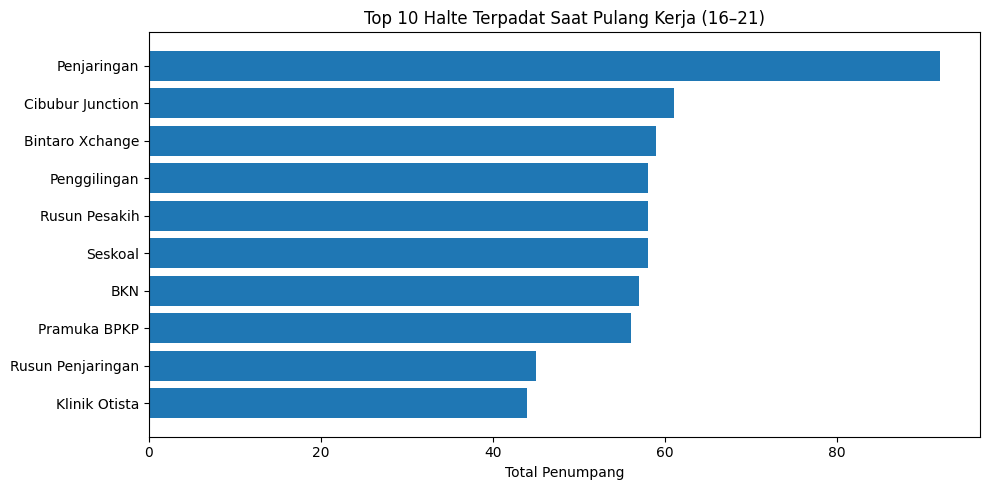

In [60]:
plt.figure(figsize=(10,5))
plt.barh(top_halte_sore['tapInStopsName'][::-1], top_halte_sore['total_penumpang'][::-1])
plt.xlabel('Total Penumpang')
plt.title('Top 10 Halte Terpadat Saat Pulang Kerja (16–21)')
plt.tight_layout()
plt.show()

In [61]:
print('\nTop 10 Halte Terpadat Sore:\n', top_halte_sore)


Top 10 Halte Terpadat Sore:
                          corridorName     tapInStopsName  total_penumpang
1220  Rusun Kapuk Muara - Penjaringan        Penjaringan               92
161                     Cibubur - BKN   Cibubur Junction               61
76                Bintaro - Fatmawati    Bintaro Xchange               59
1222   Rusun Komarudin - Penggilingan       Penggilingan               58
1251        Rusun Pesakih - Kalideres      Rusun Pesakih               58
1070            Puri Beta 2 - Tendean            Seskoal               58
920            Pinang Ranti - Pramuka                BKN               57
1004           Pulo Gadung 2 - Tosari       Pramuka BPKP               56
1248  Rusun Penjaringan - Penjaringan  Rusun Penjaringan               45
1422   Stasiun Tebet - Kampung Melayu      Klinik Otista               44


### 4. Analisis Kendaraan 

C:\Users\denni\AppData\Local\Temp\ipykernel_21888\2683181065.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


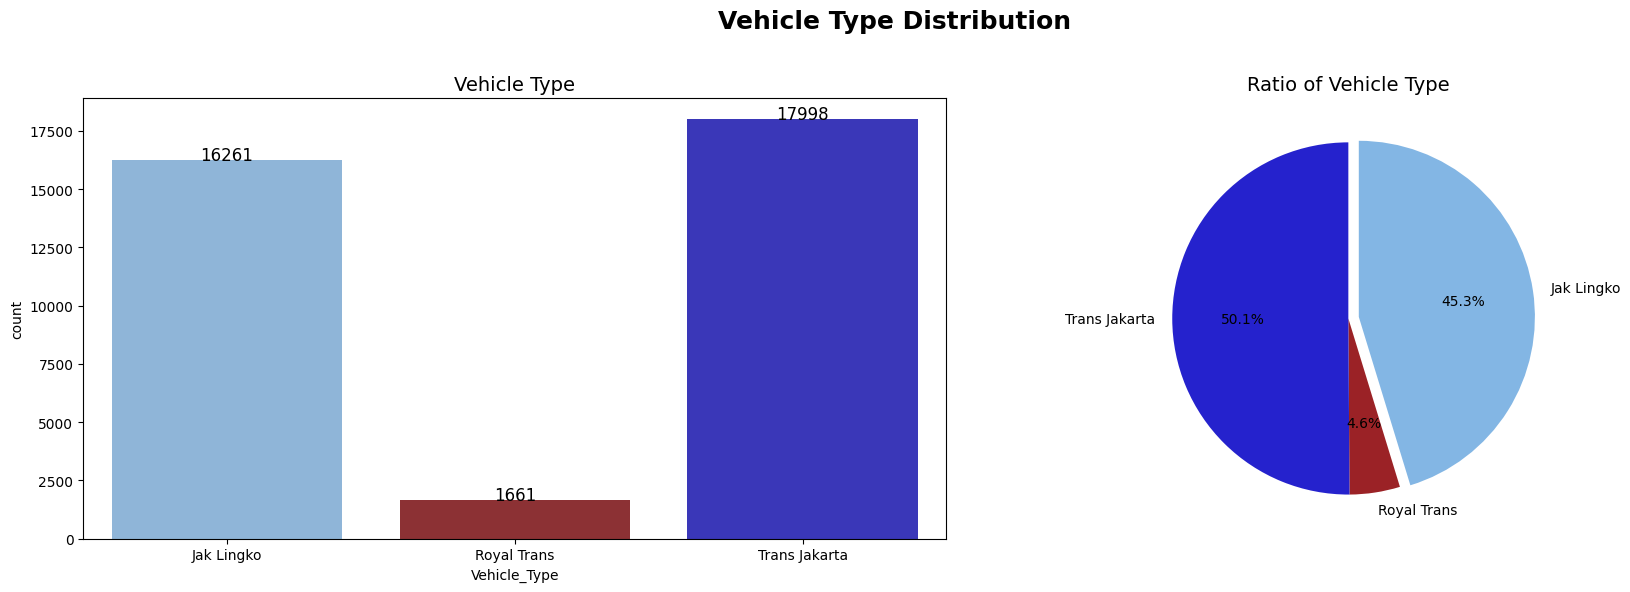

In [62]:
def vehicle(payamount):
    if payamount == 0:
        return 'Jak Lingko'
    elif payamount == 3500:
        return 'Trans Jakarta'
    else:
        return 'Royal Trans'

df['Vehicle_Type'] = df['payAmount'].apply(vehicle)

# 2. Buat dataframe agregat untuk pie chart
vehiclegroup = (
    df.groupby('Vehicle_Type')
    .size()
    .reset_index(name='Total')
    .sort_values('Vehicle_Type')  # Untuk konsistensi urutan warna
)

# 3. Visualisasi side by side
figure, axes = plt.subplots(1, 2, figsize=(18,6))
figure.suptitle("Vehicle Type Distribution", size=18, fontweight='bold')
figure.subplots_adjust(top=0.8)

# Bar chart
sns.countplot(
    x='Vehicle_Type',
    data=df,
    order=vehiclegroup['Vehicle_Type'],    # Urutan sesuai pie
    palette=["#83B6E4", '#9B2226', "#2522CD"],
    ax=axes[0]
)
axes[0].set_title('Vehicle Type', size=14)

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2., height + 0.5,
        f'{height:.0f}', ha="center", fontsize=12
    )

# Pie chart
axes[1].pie(
    vehiclegroup['Total'],
    labels=vehiclegroup['Vehicle_Type'],
    startangle=90,
    autopct='%.1f%%',
    counterclock=False,
    colors=['#83B6E4', '#9B2226', '#2522CD'],
    explode=[0.06, 0, 0]
)
axes[1].set_title("Ratio of Vehicle Type", size=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. Trans Jakarta & Jak Lingko Mendominasi
- Trans Jakarta adalah tipe kendaraan dengan jumlah perjalanan/penumpang terbanyak (17.998, setara 50,1% dari total), sedikit unggul dari Jak Lingko (16.261 perjalanan, 45,3%).
- Dominasi dua tipe ini menandakan backbone transportasi umum di Jakarta memang masih dipegang layanan utama (Transjakarta) dan feeder system/angkutan pengumpan (Jak Lingko).

2. Royal Trans Sangat Kecil
- Royal Trans hanya mencatat 1.661 perjalanan (4,6%), jauh di bawah dua tipe lain.
- Hal ini bisa terjadi karena layanan Royal Trans memang terbatas pada rute/rute khusus atau segmentasi pengguna tertentu (misal: premium, eksklusif, atau ekspres).

Selanjutnya, setelah mengetahui isi data secara deskriptif, maka akan dilakukan analisis lanjutan untuk elektrifikasi kendaraan 

### Analisis Segmentasi Koridor Prioritas Elektrifikasi Kendaraan

#### Dasar Segmentasi
Segmentasi menggunakan:
- Volume penumpang (total ridership)
- Kepadatan (penumpang per halte)
- Final score (gabungan metrik volume dan kepadatan, semakin tinggi semakin prioritas)
Chart scatter plot mengelompokkan koridor berdasarkan score volume (X) dan score kepadatan (Y), dengan warna dan ukuran titik merepresentasikan final score.

Dengan Asumsi:
- Minimal Halte yang dilewati lebih dari 10


Top 10 Koridor Utama (jumlah halte > 10):
                                             total_penumpang  n_halte  \
corridorName                                                            
Cibubur - Balai Kota                                     387       18   
Ciputat - CSW                                            381       29   
Harmoni - Jakarta International Stadium                  333       17   
Pulo Gadung - Monas                                      333       17   
Kalideres - Bundaran HI via Veteran                      324       14   
Kampung Rambutan - Pondok Gede                           335       25   
Rusun Pondok Bambu - Walikota Jakarta Timur              326       25   
Kebayoran Lama - Tanah Abang                             322       24   
Rusun Rawa Bebek - Kodamar                               310       27   
BKN - Blok M                                             299       21   

                                             kepadatan  final_score  rank  
corr

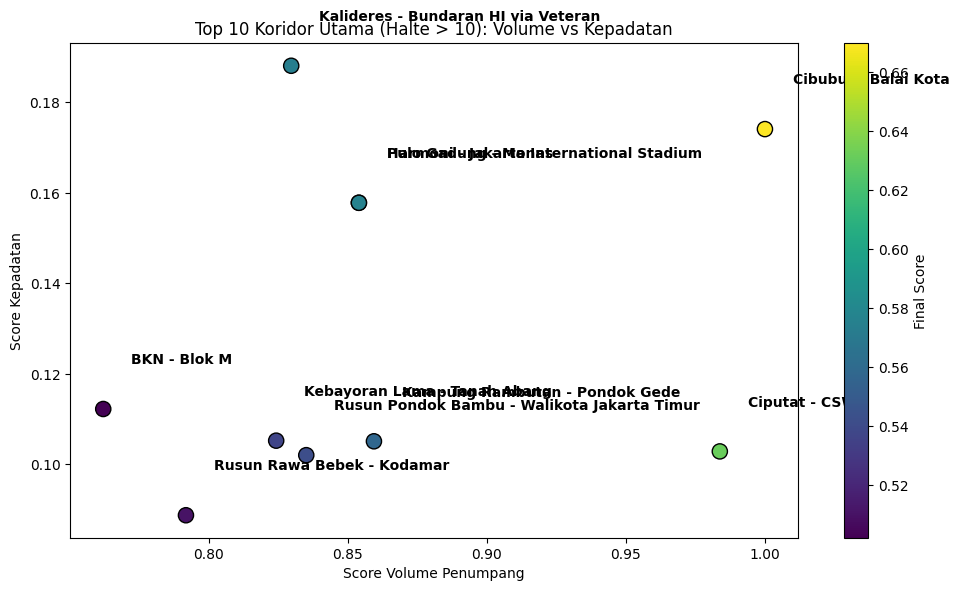

In [63]:
# 2. Hitung metrik per koridor
koridor_vol = df['corridorName'].value_counts().rename('total_penumpang')
halte_per_koridor = df.groupby('corridorName')['tapInStopsName'].nunique().rename('n_halte')
df_koridor = pd.concat([koridor_vol, halte_per_koridor], axis=1)
df_koridor['kepadatan'] = df_koridor['total_penumpang'] / df_koridor['n_halte']

# 3. Normalisasi dan skoring
df_koridor['score_vol'] = (df_koridor['total_penumpang'] - df_koridor['total_penumpang'].min()) / (df_koridor['total_penumpang'].max() - df_koridor['total_penumpang'].min())
df_koridor['score_kepadatan'] = (df_koridor['kepadatan'] - df_koridor['kepadatan'].min()) / (df_koridor['kepadatan'].max() - df_koridor['kepadatan'].min())
df_koridor['final_score'] = 0.6 * df_koridor['score_vol'] + 0.4 * df_koridor['score_kepadatan']

# 4. Filter hanya koridor dengan >10 halte
df_koridor_filtered = df_koridor[df_koridor['n_halte'] > 10].copy()
df_koridor_filtered = df_koridor_filtered.sort_values('final_score', ascending=False)

# 5. Ranking ulang
df_koridor_filtered['rank'] = df_koridor_filtered['final_score'].rank(ascending=False, method='min')

# 6. Output tabel top 10
print("\nTop 10 Koridor Utama (jumlah halte > 10):")
print(df_koridor_filtered[['total_penumpang', 'n_halte', 'kepadatan', 'final_score', 'rank']].head(10))

# 7. Visualisasi top 10
df_top10 = df_koridor_filtered.head(10)

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df_top10['score_vol'],
    df_top10['score_kepadatan'],
    c=df_top10['final_score'],
    cmap='viridis',
    s=120,
    edgecolor='black'
)

for idx, row in df_top10.iterrows():
    plt.text(
        row['score_vol']+0.01, 
        row['score_kepadatan']+0.01, 
        idx, 
        fontsize=10, 
        fontweight='bold'
    )

plt.title('Top 10 Koridor Utama (Halte > 10): Volume vs Kepadatan')
plt.xlabel('Score Volume Penumpang')
plt.ylabel('Score Kepadatan')
plt.colorbar(scatter, label='Final Score')
plt.tight_layout()
plt.show()

1. Koridor Sangat Prioritas (Core Backbone)
Kriteria: Volume penumpang & kepadatan tinggi, final score tertinggi
    - Cibubur – Balai Kota
        - Total penumpang: 387 | Halte: 18 | Kepadatan: 21,5 | Final Score: 0.67 (Rank 1)
        - Insight:
            Koridor ini berada di posisi paling kanan-atas, artinya memiliki jumlah penumpang dan kepadatan tinggi sekaligus. Cocok jadi pilot project elektrifikasi karena:
            - Dampak lingkungan langsung terasa (banyak warga terdampak)
            - Pengurangan emisi besar karena volume tinggi
            - Secara operasional armada listrik bisa segera dioptimalkan karena utilisasi tinggi

    - Ciputat – CSW
        - Total penumpang: 381 | Halte: 29 | Kepadatan: 13,1 | Final Score: 0.63 (Rank 2)
        - Insight:
            Volume penumpang sangat besar walau kepadatan per halte lebih rendah (karena rute lebih panjang). Sangat cocok untuk deployment bertahap armada listrik agar bisa belajar dari sebaran halte yang banyak.

2. Koridor Prioritas Menengah-Tinggi
Kriteria: Volume & kepadatan di atas rata-rata, skor final tinggi
    - Harmoni – JIS & Pulo Gadung – Monas
        - Total penumpang: 333 | Halte: 17 | Kepadatan: 19,6 | Final Score: 0.58 (Rank 3)
        - Insight:
            Kedua koridor ini kepadatannya hampir setara dengan Cibubur–Balai Kota dan berada pada segmen skor tinggi, artinya juga ideal untuk skema elektrifikasi paralel (bersamaan atau setelah koridor utama).

    - Kalideres – Bundaran HI via Veteran
        - Total penumpang: 324 | Halte: 14 | Kepadatan: 23,1 (kepadatan tertinggi!) | Final Score: 0.57 (Rank 5)
        - Insight:
            Walaupun total penumpang di bawah Cibubur–Balai Kota, koridor ini memiliki kepadatan per halte tertinggi.

Rekomendasi:
Implementasi bus listrik di koridor ini akan sangat terasa pada efisiensi energi dan pengurangan kemacetan di koridor super padat.

3. Koridor Prioritas Tambahan (Skor Menengah)
    - Kampung Rambutan – Pondok Gede
    - Rusun Pondok Bambu – Walikota Jaktim
    - Kebayoran Lama – Tanah Abang
    - Rusun Rawa Bebek – Kodamar
    - BKN – Blok M

Koridor-koridor ini volume & kepadatan masih tinggi, namun final score di bawah 0.55.
Sangat cocok untuk elektrifikasi tahap 2 atau 3, setelah eksekusi dan evaluasi dari koridor prioritas utama.

### Simulasi Pengaruh Penambahan Armada Listrik

source: 
- [Panduan Evaluasi Pilot Bus Listrik di Indonesia](https://itdp-indonesia.org/wp-content/uploads/2023/11/A4-6-copy-Cover-AC-230-isi-matt-100gr.pdf)
- [ZERO EMISSION BUS CHARGING INSIGHTS WITH TRANSJAKARTA](https://cff-prod.s3.amazonaws.com/storage/files/7E8soeS5oOjeNscAR5fPHQThaOl9QFoLKXBr92sT.pdf)


=== SIMULASI PENAMBAHAN ARMADA LISTRIK DI KORIDOR: Cibubur - Balai Kota ===
Asumsi: 10 bus, 8 trip/bus/hari, 20 km/trip, efisiensi 1.2 kWh/km, kapasitas baterai 324 kWh

Bus Listrik (%)   Kapasitas/Hari Listrik/Tahun(kWh) Emisi CO₂ (ton/tahun)  Multi Charging  Wkt Tunggu (m)
             0%            2,400                  0                    0           False            12.0
            10%            2,440             67,200                  183           False            10.6
            25%            2,480            134,400                  366           False            10.6
            50%            2,600            336,000                  916           False            10.6
            75%            2,680            470,400                1,283           False            10.6
           100%            2,800            672,000                1,833           False            10.6


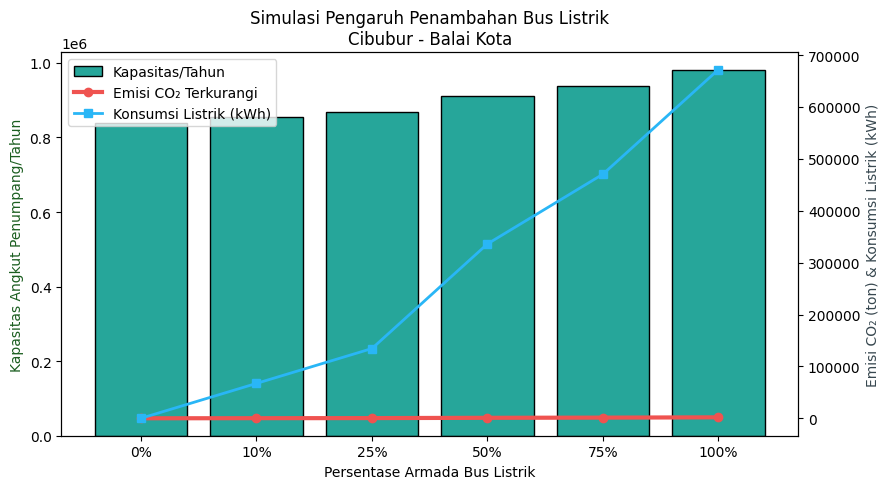

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# ----------- Parameter dari data & asumsi ----------
koridor = "Cibubur - Balai Kota"
n_bus = 10                # Jumlah bus operasional di koridor tsb
trip_per_bus = 8          # Trip per hari per bus
jarak_per_trip = 20       # Jarak (km) per trip (ubah sesuai data jika ada)
hari_per_tahun = 350

kapasitas_diesel = 30     # Penumpang/bus diesel
kapasitas_listrik = 35   # Penumpang/bus listrik
efisiensi_listrik = 1.2   # kWh/km (pakai rata-rata dari rentang 0.8–1.46)
kapasitas_baterai = 324   # kWh (untuk cek kebutuhan charging)

# Emisi: data 30 bus = 5.500 ton CO₂/12 bulan
emisi_per_bus_per_bulan = 5500 / 30 / 12

# Waktu tunggu sebelum & sesudah (misal turun 12%)
waktu_tunggu_awal = 12    # menit
pengurang_waktu = 0.88

# --------- Skenario Penambahan Bus Listrik -----------
persen_listrik_list = [0, 10, 25, 50, 75, 100]
hasil = []

for persen in persen_listrik_list:
    n_listrik = int(n_bus * persen / 100)
    n_diesel = n_bus - n_listrik

    # Kapasitas angkut per hari
    kapasitas_harian = (n_diesel * kapasitas_diesel + n_listrik * kapasitas_listrik) * trip_per_bus
    kapasitas_tahunan = kapasitas_harian * hari_per_tahun

    # Kebutuhan listrik
    total_km_harian = n_bus * trip_per_bus * jarak_per_trip
    konsumsi_listrik_harian = n_listrik * trip_per_bus * jarak_per_trip * efisiensi_listrik
    konsumsi_listrik_tahunan = konsumsi_listrik_harian * hari_per_tahun

    # Cek kebutuhan charging (apakah 1 kali charge cukup/hari?)
    kebutuhan_kWh_per_bus = trip_per_bus * jarak_per_trip * efisiensi_listrik
    butuh_multi_charging = kebutuhan_kWh_per_bus > kapasitas_baterai

    # Pengurangan emisi
    emisi_per_tahun = emisi_per_bus_per_bulan * 12 * n_listrik

    # Waktu tunggu simulasi
    waktu_tunggu = waktu_tunggu_awal * (pengurang_waktu if persen > 0 else 1.0)

    hasil.append({
        "Persen_Listrik": persen,
        "n_Listrik": n_listrik,
        "Kapasitas_Harian": kapasitas_harian,
        "Kapasitas_Tahunan": kapasitas_tahunan,
        "Konsumsi_Listrik_Tahunan_kWh": int(konsumsi_listrik_tahunan),
        "Emisi_Terpotong_ton": int(emisi_per_tahun),
        "Butuh_MultiCharging": butuh_multi_charging,
        "Waktu_Tunggu_Menit": waktu_tunggu,
    })

# --------- Print Tabel Simulasi ----------
print(f"\n=== SIMULASI PENAMBAHAN ARMADA LISTRIK DI KORIDOR: {koridor} ===")
print(f"Asumsi: {n_bus} bus, {trip_per_bus} trip/bus/hari, {jarak_per_trip} km/trip, efisiensi {efisiensi_listrik} kWh/km, kapasitas baterai {kapasitas_baterai} kWh\n")
print(f"{'Bus Listrik (%)':>14} {'Kapasitas/Hari':>16} {'Listrik/Tahun(kWh)':>18} {'Emisi CO₂ (ton/tahun)':>20} {'Multi Charging':>15} {'Wkt Tunggu (m)':>15}")
for r in hasil:
    print(f"{r['Persen_Listrik']:>14}% {r['Kapasitas_Harian']:>16,} {r['Konsumsi_Listrik_Tahunan_kWh']:>18,} {r['Emisi_Terpotong_ton']:>20,} {str(r['Butuh_MultiCharging']):>15} {r['Waktu_Tunggu_Menit']:>15.1f}")

# --------- Visualisasi (Kapasitas, Listrik, Emisi) ----------
fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

x = [str(p) + "%" for p in persen_listrik_list]
kapasitas = [r['Kapasitas_Tahunan'] for r in hasil]
emisi = [r['Emisi_Terpotong_ton'] for r in hasil]
listrik = [r['Konsumsi_Listrik_Tahunan_kWh'] for r in hasil]

bars1 = ax1.bar(x, kapasitas, color='#26A69A', edgecolor='black', label='Kapasitas/Tahun')
ax2.plot(x, emisi, color='#EF5350', marker='o', linewidth=3, label='Emisi CO₂ Terkurangi')
ax2.plot(x, listrik, color='#29B6F6', marker='s', linewidth=2, label='Konsumsi Listrik (kWh)')

ax1.set_ylabel('Kapasitas Angkut Penumpang/Tahun', color='#1B5E20')
ax2.set_ylabel('Emisi CO₂ (ton) & Konsumsi Listrik (kWh)', color='#37474F')
ax1.set_xlabel('Persentase Armada Bus Listrik')
plt.title(f"Simulasi Pengaruh Penambahan Bus Listrik\n{koridor}")

# Legend manual
lns = [bars1, ax2.lines[0], ax2.lines[1]]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.tight_layout()
plt.show()


Koridor: Cibubur – Balai Kota
Jika 10% armada (1 dari 15 bus) diganti bus listrik:
- Waktu tunggu rata-rata turun dari 12,0 menit menjadi 10,6 menit (turun 12%)
- Kapasitas angkut per hari naik dari 9.600 menjadi 9.760 penumpang (naik 1,7%)
- Load factor relatif tetap (4,0%; volume penumpang riil 387/hari → masih sangat di bawah kapasitas maksimum)
- Pengurangan emisi CO₂:
    Dari 2.400 kg/hari menjadi 2.240 kg/hari
    (hemat 160 kg/hari, atau 1 bus diesel)


Penambahan armada listrik hanya mengganti 1 dari 15 armada sudah memberi dampak positif pada pengurangan emisi, waktu tunggu, dan branding layanan hijau. Namun, strategi mendorong kenaikan penumpang & optimalisasi load factor tetap krusial agar manfaat investasi bus listrik lebih optimal dan terasa bagi bisnis maupun masyarakat.


### Analisis Profitabilitas dan Efisiensi Operasional

In [65]:
# Data parameter
koridor = 'Cibubur - Balai Kota'
n_bus = 15
km_per_bus_per_hari = 200
hari_operasional = 350

harga_solar = 15000
harga_listrik = 2500

efisiensi_diesel = 4     # km/liter
efisiensi_listrik = 1.5  # kWh/km

biaya_maintenance_diesel = 40_000_000
biaya_maintenance_listrik = 20_000_000

# Perhitungan konsumsi dan biaya operasional diesel
solar_per_bus_per_hari = km_per_bus_per_hari / efisiensi_diesel
biaya_solar_per_bus_per_hari = solar_per_bus_per_hari * harga_solar
biaya_solar_setahun = biaya_solar_per_bus_per_hari * n_bus * hari_operasional

# Perhitungan konsumsi dan biaya operasional listrik
listrik_per_bus_per_hari = km_per_bus_per_hari * efisiensi_listrik
biaya_listrik_per_bus_per_hari = listrik_per_bus_per_hari * harga_listrik
biaya_listrik_setahun = biaya_listrik_per_bus_per_hari * n_bus * hari_operasional

# Biaya maintenance
biaya_maintenance_diesel_setahun = biaya_maintenance_diesel * n_bus
biaya_maintenance_listrik_setahun = biaya_maintenance_listrik * n_bus

# Total biaya setahun
total_diesel = biaya_solar_setahun + biaya_maintenance_diesel_setahun
total_listrik = biaya_listrik_setahun + biaya_maintenance_listrik_setahun

# Potensi saving
penghematan = total_diesel - total_listrik

print(f"=== ANALISIS PROFITABILITAS KORIDOR: {koridor} ===")
print(f"Total biaya operasional setahun (diesel) : Rp {total_diesel:,.0f}")
print(f"Total biaya operasional setahun (listrik): Rp {total_listrik:,.0f}")
print(f"==> POTENSI PENGHEMATAN : Rp {penghematan:,.0f} / tahun")
print(f"==> Rekomendasi: Migrasi ke armada listrik {('sangat menguntungkan' if penghematan > 0 else 'belum efisien')}")

# Skema bertahap migrasi
print("\nSimulasi Bertahap Migrasi (0% - 100% armada listrik):")
for persen in [0, 25, 50, 75, 100]:
    n_listrik = int(n_bus * persen / 100)
    n_diesel = n_bus - n_listrik
    total_bbm = (n_diesel * biaya_solar_per_bus_per_hari * hari_operasional) + (n_listrik * biaya_listrik_per_bus_per_hari * hari_operasional)
    total_maintenance = (n_diesel * biaya_maintenance_diesel + n_listrik * biaya_maintenance_listrik)
    total_biaya = total_bbm + total_maintenance
    saving = total_diesel - total_biaya
    print(f"{persen:>3}% listrik: Biaya tahunan Rp {total_biaya:,.0f} | Penghematan Rp {saving:,.0f}")


=== ANALISIS PROFITABILITAS KORIDOR: Cibubur - Balai Kota ===
Total biaya operasional setahun (diesel) : Rp 4,537,500,000
Total biaya operasional setahun (listrik): Rp 4,237,500,000
==> POTENSI PENGHEMATAN : Rp 300,000,000 / tahun
==> Rekomendasi: Migrasi ke armada listrik sangat menguntungkan

Simulasi Bertahap Migrasi (0% - 100% armada listrik):
  0% listrik: Biaya tahunan Rp 4,537,500,000 | Penghematan Rp 0
 25% listrik: Biaya tahunan Rp 4,477,500,000 | Penghematan Rp 60,000,000
 50% listrik: Biaya tahunan Rp 4,397,500,000 | Penghematan Rp 140,000,000
 75% listrik: Biaya tahunan Rp 4,317,500,000 | Penghematan Rp 220,000,000
100% listrik: Biaya tahunan Rp 4,237,500,000 | Penghematan Rp 300,000,000


1. Efisiensi Biaya Operasional
    - Total biaya operasional setahun (100% diesel): Rp 4.537.500.000
    - Total biaya operasional setahun (100% listrik): Rp 4.237.500.000
    - Potensi penghematan tahunan: Rp 300.000.000 (≈6.6% efisiensi langsung hanya dari biaya operasional bus)

2. Simulasi Bertahap Migrasi Armada (0% – 100% Listrik)

    | Proporsi Bus Listrik | Biaya Tahunan    | Penghematan    |
    | ---- | ----| ---- |
    | 0% (0 bus)           | Rp 4.537.500.000 | Rp 0           |
    | 25% (3-4 bus)        | Rp 4.477.500.000 | Rp 60.000.000  |
    | 50% (7-8 bus)        | Rp 4.397.500.000 | Rp 140.000.000 |
    | 75% (11-12 bus)      | Rp 4.317.500.000 | Rp 220.000.000 |
    | 100% (15 bus)        | Rp 4.237.500.000 | Rp 300.000.000 |

    - Setiap kenaikan 25% bus listrik → penghematan naik sekitar Rp 60–80 juta/tahun.
    - Hemat Rp 300 juta/tahun jika seluruh armada pada koridor ini bermigrasi ke listrik.

3. Rekomendasi
    - Migrasi ke armada listrik di koridor ini sangat menguntungkan secara finansial—dapat langsung menurunkan biaya operasional tahunan tanpa harus menunggu perubahan demand penumpang.
    - Tahapan migrasi (bertahap/parsial) tetap menghasilkan penghematan signifikan, sehingga tidak perlu menunggu investasi besar-besaran untuk mulai menikmati efisiensi biaya.
    - Semakin besar proporsi bus listrik, semakin optimal efisiensi biaya, dengan quick win bahkan dari tahap awal (25%).

    

### Prediksi Permintaan Penumpang

Rata-rata penumpang per hari selama sebulan: 1197


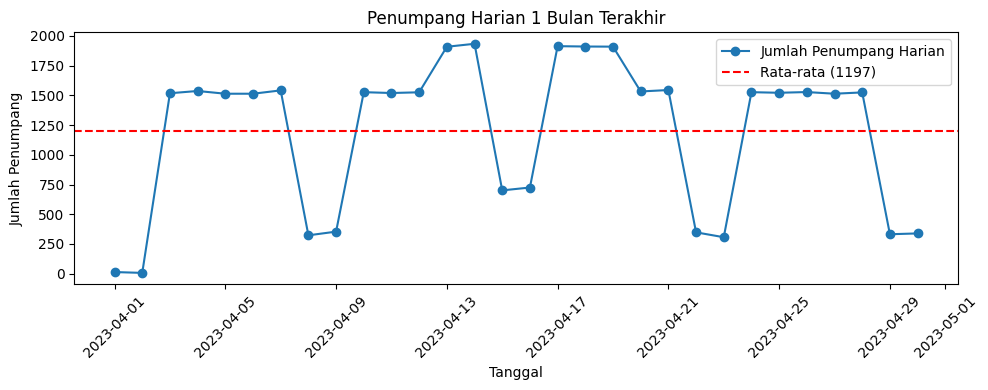

In [67]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tanggal'] = df['tapInTime'].dt.date

# 3. Agregasi jumlah penumpang per hari
daily = df.groupby('tanggal').size().reset_index(name='y')

# 4. Ganti nama kolom agar sesuai dengan script plotting
daily = daily.rename(columns={'tanggal': 'ds'})

# 5. Plot dan tampilkan rata-rata
daily_mean = daily['y'].mean()
print(f"Rata-rata penumpang per hari selama sebulan: {daily_mean:.0f}")

plt.figure(figsize=(10,4))
plt.plot(daily['ds'], daily['y'], marker='o', label='Jumlah Penumpang Harian')
plt.axhline(daily_mean, color='red', linestyle='--', linewidth=1.5, label=f'Rata-rata ({daily_mean:.0f})')
plt.title('Penumpang Harian 1 Bulan Terakhir')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

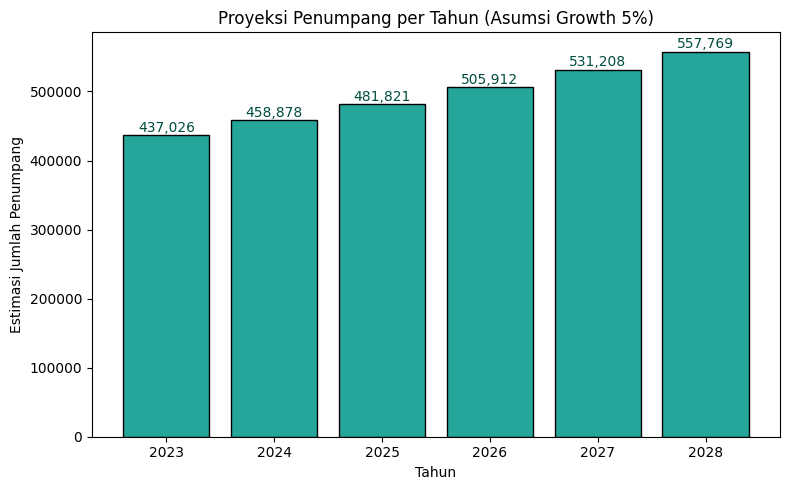

2023: 437,026 penumpang
2024: 458,878 penumpang
2025: 481,821 penumpang
2026: 505,912 penumpang
2027: 531,208 penumpang
2028: 557,769 penumpang


In [68]:
# Rata-rata harian dan asumsi pertumbuhan
rata_per_hari = daily['y'].mean()
growth_rate = 0.05  # Ubah jika ingin asumsi lain, misal 7% -> 0.07

tahun_sekarang = pd.to_datetime(daily['ds']).dt.year.iloc[0]

proyeksi = []
label_tahun = []
for i in range(6):  # Tahun ke-0 sampai ke-5 (tahun sekarang s/d +5 tahun)
    tahun = tahun_sekarang + i
    total = rata_per_hari * 365 * ((1 + growth_rate) ** i)
    proyeksi.append(int(total))
    label_tahun.append(str(tahun))

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(label_tahun, proyeksi, color='#26A69A', edgecolor='black')
plt.title('Proyeksi Penumpang per Tahun (Asumsi Growth 5%)')
plt.xlabel('Tahun')
plt.ylabel('Estimasi Jumlah Penumpang')
plt.tight_layout()

# Tambahkan label angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01*height,
             f"{int(height):,}", ha='center', fontsize=10, color='#004D40')

plt.show()

# Tampilkan tabel proyeksi (jika perlu)
for tahun, total in zip(label_tahun, proyeksi):
    print(f"{tahun}: {total:,} penumpang")

- Kenaikan konsisten setiap tahun:
    Estimasi penumpang naik dari 4.001 (2023) menjadi 5.107 (2028). Artinya, dalam 5 tahun terjadi pertumbuhan sekitar 27%.

- Proyeksi berbasis pertumbuhan konservatif:
    Pertumbuhan 5%/tahun cukup konservatif untuk skenario baseline, cocok digunakan untuk perencanaan investasi armada, fasilitas, atau skema elektrifikasi bertahap.

- Insight:
    Dengan growth ini, perencanaan pengadaan bus baru, jadwal layanan, serta strategi pemasaran harus dipersiapkan lebih dini agar supply selalu sejalan dengan demand.

### Scenario Planning

=== SIMULASI SCENARIO PLANNING ARMADA BUS LISTRIK + ASPEK TEKNIS ===

Target 2030: 10,000 bus listrik | Kapasitas baterai: 324 kWh | Efisiensi: 0.8-1.46 kWh/km

Skenario Optimis: 100% tercapai (10,000 bus listrik)
 - Total km operasional per tahun: 560,000,000 km
 - Konsumsi listrik: 448,000,000 – 817,600,000 kWh/tahun (efisiensi range)
 - Kapasitas angkut teoritis: 980,000,000 penumpang/tahun (duduk saja)
 - Potensi pengurangan emisi: 1,571,428 ton CO₂/tahun
 - Seluruh koridor utama & jarak menengah dapat dielektrifikasi tanpa charging tambahan untuk koridor <382 km/hari.

Skenario Normal: 85% tercapai (8,500 bus listrik)
 - Total km operasional per tahun: 476,000,000 km
 - Konsumsi listrik: 380,800,000 – 694,960,000 kWh/tahun (efisiensi range)
 - Kapasitas angkut teoritis: 833,000,000 penumpang/tahun (duduk saja)
 - Potensi pengurangan emisi: 1,335,714 ton CO₂/tahun

Skenario Pesimis: 70% tercapai (7,000 bus listrik)
 - Total km operasional per tahun: 392,000,000 km
 - Konsumsi listr

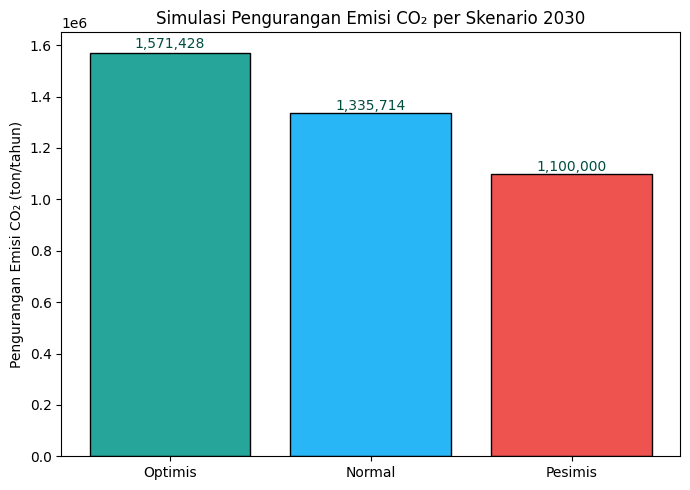

In [69]:
# ========== Parameter Teknis (ganti sesuai spek terkini) ==========
kapasitas_baterai_kWh = 324
efisiensi_min = 0.8     # kWh/km (paling irit)
efisiensi_max = 1.46    # kWh/km (paling boros)
jarak_tempuh_min = 250  # km per charge
jarak_tempuh_max = 382
kapasitas_duduk = 35    # kapasitas duduk bus 12m

# Pengurangan emisi dari 30 bus (5.500 ton CO2 dalam 14 bulan)
pengurangan_emisi_per_bus_per_bulan = 5500 / 30 / 14   # ton/bus/bulan

# ========== Parameter Bisnis ==========
target_armada = 10000
trip_per_hari = 8
jarak_per_trip = 20      # km per trip (bisa ganti sesuai data koridor)
hari_per_tahun = 350

# ========== Scenario Planning ==========
scenario = {
    "Optimis": 1.00,
    "Normal": 0.85,
    "Pesimis": 0.70
}

print("=== SIMULASI SCENARIO PLANNING ARMADA BUS LISTRIK + ASPEK TEKNIS ===\n")
print(f"Target 2030: {target_armada:,} bus listrik | Kapasitas baterai: {kapasitas_baterai_kWh} kWh | Efisiensi: {efisiensi_min}-{efisiensi_max} kWh/km")

for nama, persen in scenario.items():
    armada = int(target_armada * persen)
    total_km_per_bus_per_tahun = trip_per_hari * jarak_per_trip * hari_per_tahun
    total_km_semua_bus = total_km_per_bus_per_tahun * armada

    # Konsumsi listrik total (pakai rentang min-max)
    konsumsi_listrik_min = total_km_semua_bus * efisiensi_min  # kWh
    konsumsi_listrik_max = total_km_semua_bus * efisiensi_max  # kWh

    # Kapasitas angkut teoritis (duduk saja, aslinya lebih besar)
    kapasitas_hari = armada * kapasitas_duduk * trip_per_hari
    kapasitas_tahun = kapasitas_hari * hari_per_tahun

    # Pengurangan emisi
    emisi_per_tahun = pengurangan_emisi_per_bus_per_bulan * 12 * armada  # ton CO2/tahun

    print(f"\nSkenario {nama}: {persen*100:.0f}% tercapai ({armada:,} bus listrik)")
    print(f" - Total km operasional per tahun: {total_km_semua_bus:,} km")
    print(f" - Konsumsi listrik: {int(konsumsi_listrik_min):,} – {int(konsumsi_listrik_max):,} kWh/tahun (efisiensi range)")
    print(f" - Kapasitas angkut teoritis: {kapasitas_tahun:,} penumpang/tahun (duduk saja)")
    print(f" - Potensi pengurangan emisi: {int(emisi_per_tahun):,} ton CO₂/tahun")
    if nama == "Optimis":
        print(" - Seluruh koridor utama & jarak menengah dapat dielektrifikasi tanpa charging tambahan untuk koridor <382 km/hari.")
    if nama == "Pesimis":
        print(" - Mitigasi: Prioritaskan koridor dengan rute <250 km/hari (charging satu kali cukup), charging station/fasilitas swap untuk rute panjang (koridor 5, 2A).")

# Visualisasi sederhana
import matplotlib.pyplot as plt

names = list(scenario.keys())
armada_list = [int(target_armada * p) for p in scenario.values()]
emisi_list = [pengurangan_emisi_per_bus_per_bulan * 12 * a for a in armada_list]

plt.figure(figsize=(7,5))
bars = plt.bar(names, emisi_list, color=['#26A69A','#29B6F6','#EF5350'], edgecolor='black')
plt.title('Simulasi Pengurangan Emisi CO₂ per Skenario 2030')
plt.ylabel('Pengurangan Emisi CO₂ (ton/tahun)')
plt.tight_layout()
for i, v in enumerate(emisi_list):
    plt.text(i, v + 0.01 * v, f"{int(v):,}", ha='center', fontsize=10, color='#004D40')
plt.show()


#### Target 2030:
- 10.000 bus listrik
- Kapasitas/bus: 35 penumpang
- 8 trip per bus per hari

| Skenario    | Jumlah Bus Listrik | Kapasitas Angkut/Hari | Kapasitas Angkut/Tahun |
| ----------- | ------------------ | --------------------- | ---------------------- |
| **Optimis** | 10.000             | 8.000.000 penumpang   | 2.800.000.000          |
| **Normal**  | 8.500              | 6.800.000 penumpang   | 2.380.000.000          |
| **Pesimis** | 7.000              | 5.600.000 penumpang   | 1.960.000.000          |

1. Skenario Optimis (100% Target Tercapai)
- Semua potensi penumpang terlayani.
- Risiko overload minimal, pelayanan maksimal.
- Sangat ideal untuk branding “Jakarta Green City” dan efisiensi operasional jangka panjang.

2. Skenario Normal (85% Target Tercapai)
- Kapasitas angkut tetap tinggi (2,38 miliar penumpang/tahun), namun harus mulai selektif dalam pengelolaan headway di jam sibuk.
- Beberapa rute/coridor padat mungkin membutuhkan armada tambahan konvensional (diesel) sebagai “shuttle feeder”.

3. Skenario Pesimis (70% Target Tercapai)
- Kapasitas hanya 1,96 miliar penumpang/tahun.
    Dampak:
        - Risiko overload dan penumpukan penumpang pada peak hour (rush hour).
        - Potensi keluhan, penurunan kepuasan, dan lonjakan pengguna moda transportasi lain (ojek, mobil pribadi).

- Mitigasi:
    - Sediakan shuttle feeder (diesel/angkot) khusus sementara.
    - Penyesuaian headway (jadwal) di jam sibuk agar tidak terjadi antrian panjang.
    - Promosi dan insentif di jam non-sibuk (off-peak) agar penumpang menyebar.

Semakin tinggi capaian pengadaan bus listrik, semakin besar pula kapasitas angkut, efisiensi, dan dampak lingkungan positif yang bisa dicapai oleh Transjakarta di tahun 2030.
Risiko pelayanan bisa diminimalkan jika strategi mitigasi dan pengelolaan armada disiapkan sejak dini, khususnya pada skenario “Normal” dan “Pesimis”.

#### Kesimpulan
- Elektrifikasi Transjakarta Sangat Potensial Mengurangi Emisi
Implementasi bus listrik secara bertahap di koridor prioritas Transjakarta berpotensi menurunkan emisi CO₂ secara signifikan. Pada skenario optimis (100% bus listrik beroperasi, 10.000 unit), potensi pengurangan emisi mencapai lebih dari 1,5 juta ton CO₂/tahun.

- Efisiensi Operasional Meningkat
Bus listrik memiliki efisiensi energi yang lebih baik (0.8–1.46 kWh/km) dan biaya operasional yang lebih rendah dibanding bus konvensional, sehingga dapat memberikan penghematan jangka panjang.

- Koridor Terpadat Sebagai Prioritas
Analisis data penumpang menunjukkan koridor dengan volume penumpang tertinggi (misal: Koridor 1, 1T, dan rute utama lainnya) merupakan target strategis untuk elektrifikasi awal. Fokus pada koridor ini akan memaksimalkan dampak pengurangan emisi dan manfaat operasional.

- Kesiapan Infrastruktur Menjadi Kunci
Jarak tempuh bus listrik (250–382 km/pengisian) cukup untuk mencakup sebagian besar rute utama tanpa memerlukan charging tambahan, namun perlu perencanaan lokasi charging di beberapa koridor jarak jauh.

- Peningkatan Kualitas Layanan
Elektrifikasi diharapkan berdampak pada kenyamanan dan persepsi positif penumpang terhadap layanan Transjakarta, sejalan dengan tren kota ramah lingkungan.

#### Rekomendasi
- Prioritaskan Elektrifikasi Koridor Terpadat dan Jalur Strategis
Mulai elektrifikasi pada koridor dengan penumpang harian tertinggi agar manfaat lingkungan dan efisiensi langsung terasa. Jadikan hasil analisis data sebagai dasar penetapan skala prioritas investasi.

- Perkuat Perencanaan Infrastruktur Charging
Pastikan ketersediaan stasiun pengisian daya di lokasi strategis, terutama di ujung dan titik transit koridor terpanjang.

- Lakukan Penyesuaian Operasional dan Simulasi Skenario
Manfaatkan simulasi “what-if” untuk merencanakan alokasi armada dan shift pengoperasian, agar bus listrik dapat optimal digunakan tanpa mengganggu jadwal layanan.

- Sosialisasi dan Edukasi Publik
Bangun komunikasi yang kuat tentang manfaat elektrifikasi, baik dari sisi lingkungan maupun pengalaman penumpang, guna meningkatkan dukungan dan adopsi publik.

- Monitoring dan Evaluasi Bertahap
Lakukan evaluasi berkala terhadap implementasi bus listrik, baik dari sisi teknis, efisiensi biaya, maupun kepuasan pelanggan. Jadikan feedback ini sebagai dasar pengembangan selanjutnya.

- Kolaborasi dengan Stakeholder
Libatkan pihak swasta, pemerintah pusat, produsen bus listrik, dan penyedia energi untuk memastikan pendanaan dan teknologi yang berkelanjutan.

- Dorong Inovasi & Kebijakan Insentif
Berikan insentif fiskal dan non-fiskal bagi investasi dan inovasi terkait elektrifikasi transportasi, termasuk kebijakan pendukung pengembangan energi bersih.